# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
# !pip install xgboost

In [3]:
df = pd.read_csv(r"E:\explorers\ai4i2020.csv")

In [4]:
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [5]:
df.sample(5)

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
5416  5417     L52596    L                302.6                    312.3   
3296  3297     M18156    M                301.2                    310.3   
6385  6386     L53565    L                300.1                    309.7   
8851  8852     M23711    M                297.7                    308.9   
2491  2492     L49671    L                299.1                    308.9   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
5416                    1660         30.3               36                0   
3296                    1379         43.2               56                0   
6385                    1410         48.3              118                0   
8851                    1573         35.1                9                0   
2491                    1445         43.4              197                0   

      TWF  HDF  PWF  OSF  RNF  
5416    0    0    0    0    0  
3296    0    0    0    0    0  
6385    0    0    0    0    0  
8851    0    0    0    0    0  
2491    0    0    0    0    0

# Data Preprocessing

In [6]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [9]:
df.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

# EDA

([<matplotlib.patches.Wedge at 0x22cbf62fed0>,
 [Text(-1.093767649365066, 0.11692873557179052, '0'),
  Text(1.19320106307744, -0.12755870441043116, '1')],
 [Text(-0.5966005360173088, 0.06377931031188573, '96.6%'),
  Text(0.6960339534618398, -0.07440924423941818, '3.4%')])

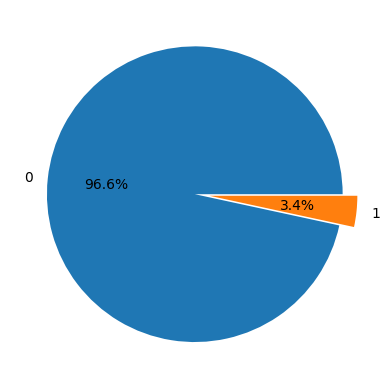

In [10]:
slices = df['Machine failure'].value_counts()
plt.pie(slices, labels = [0,1], autopct="%1.1f%%",explode=[0,0.1])

([<matplotlib.patches.Wedge at 0x22cc5960690>,
 [Text(-1.0998851401192258, 0.01589586565465753, '0'),
  Text(1.1998746989460918, -0.01734090046757561, '1')],
 [Text(-0.5999373491559413, 0.008670472175267743, '99.5%'),
  Text(0.6999269077185534, -0.010115525272752437, '0.5%')])

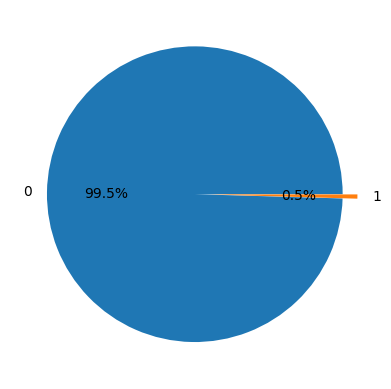

In [11]:
slices = df['TWF'].value_counts()
plt.pie(slices, labels = [0,1], autopct="%1.1f%%",explode=[0,0.1])

([<matplotlib.patches.Wedge at 0x22cc59a2550>,
 [Text(-1.0992821876132792, 0.039732505535934964, '0'),
  Text(1.1992169318149402, -0.04334455500246, '1')],
 [Text(-0.5996084659708796, 0.021672275746873613, '98.8%'),
  Text(0.6995432102253817, -0.025284323751435, '1.2%')])

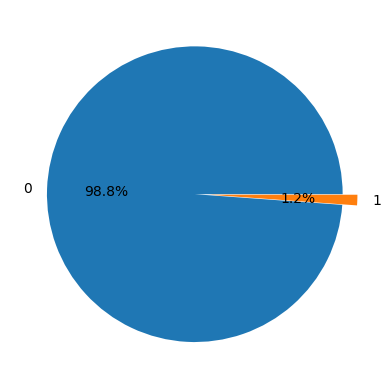

In [12]:
slices = df['HDF'].value_counts()
plt.pie(slices, labels = [0,1], autopct="%1.1f%%",explode=[0,0.1])

([<matplotlib.patches.Wedge at 0x22cc59ef950>,
 [Text(-1.0995101311211117, 0.03282486194998609, '0'),
  Text(1.1994655945483015, -0.035809042082830325, '1')],
 [Text(-0.5997327987933336, 0.017904470154537864, '99.0%'),
  Text(0.6996882634865091, -0.02088860788165102, '0.9%')])

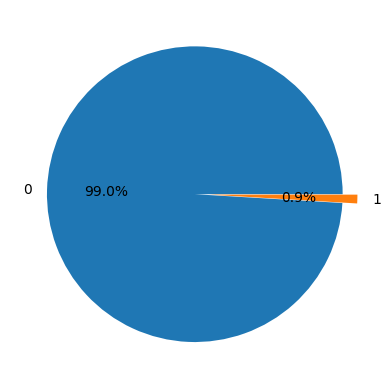

In [13]:
slices = df['PWF'].value_counts()
plt.pie(slices, labels = [0,1], autopct="%1.1f%%",explode=[0,0.1])

([<matplotlib.patches.Wedge at 0x22cc5804310>,
 [Text(-1.0994787071392618, 0.03386107717390923, '0'),
  Text(1.1994313149337799, -0.03693942008510344, '1')],
 [Text(-0.5997156584395973, 0.018469678458495942, '99.0%'),
  Text(0.699668267044705, -0.02154799504964367, '1.0%')])

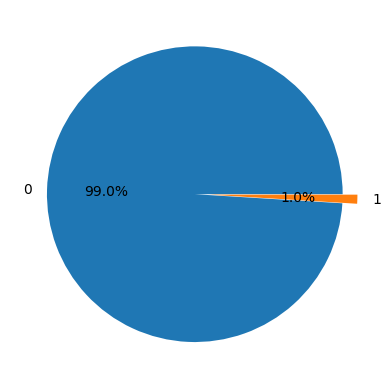

In [14]:
slices = df['OSF'].value_counts()
plt.pie(slices, labels = [0,1], autopct="%1.1f%%",explode=[0,0.1])

([<matplotlib.patches.Wedge at 0x22cc5822310>,
 [Text(-1.0999804036025838, 0.00656594930661277, '0'),
  Text(1.1999786217241972, -0.007162918741438169, '1')],
 [Text(-0.5999893110559548, 0.003581426894516056, '99.8%'),
  Text(0.6999875293391149, -0.004178369265838932, '0.2%')])

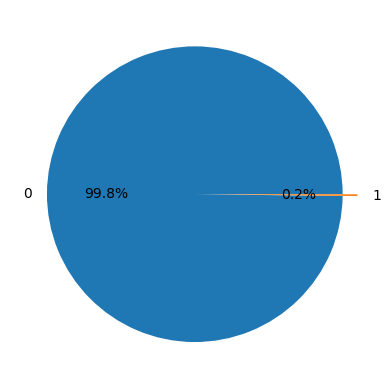

In [15]:
slices = df['RNF'].value_counts()
plt.pie(slices, labels = [0,1], autopct="%1.1f%%",explode=[0,0.1])

In [16]:
df.drop(['UDI','Product ID','Type'],axis=1,inplace=True)

In [17]:
df.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  
0         42.8                0                0    0    0    0    0    0  
1         46.3                3                0    0    0    0    0    0  
2         49.4                5                0    0    0    0    0    0  
3         39.5                7                0    0    0    0    0    0  
4         40.0                9                0    0    0    0    0    0

Text(0.5, 0.98, 'Air temperature[K] vs Torque[Nm]')

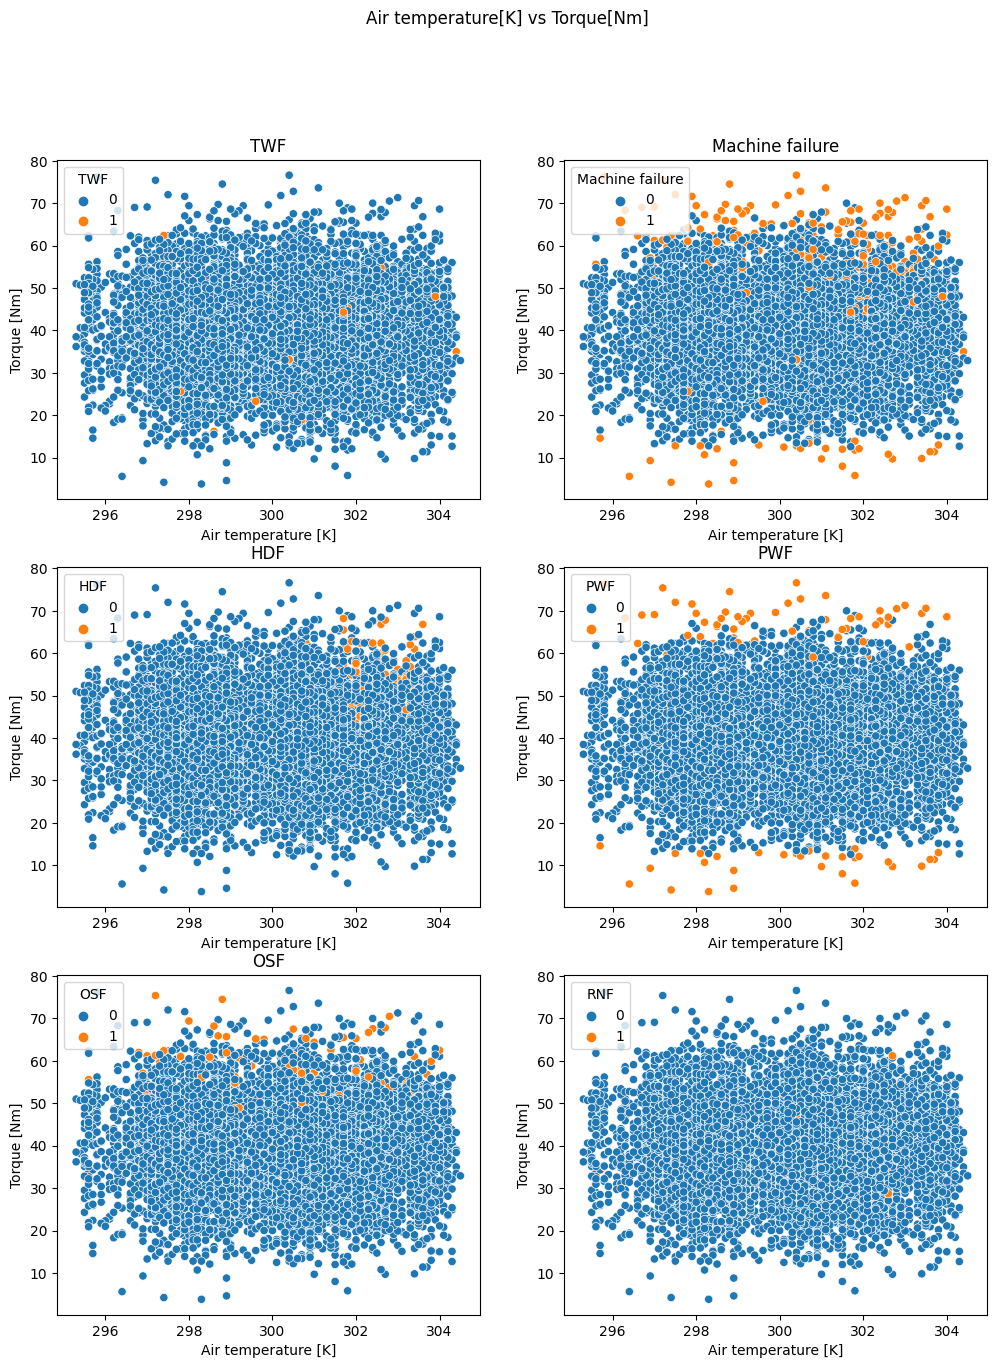

In [18]:
fig, axes = plt.subplots(3,2,figsize=(12,15))
a1 = sns.scatterplot(df,x=df['Air temperature [K]'],y=df['Torque [Nm]'],hue=df['TWF'],ax=axes[0,0])
a2 = sns.scatterplot(df,x=df['Air temperature [K]'],y=df['Torque [Nm]'],hue=df['Machine failure'],ax=axes[0,1])
a3 = sns.scatterplot(df,x=df['Air temperature [K]'],y=df['Torque [Nm]'],hue=df['HDF'],ax=axes[1,0])
a4 = sns.scatterplot(df,x=df['Air temperature [K]'],y=df['Torque [Nm]'],hue=df['PWF'],ax=axes[1,1])
a5 = sns.scatterplot(df,x=df['Air temperature [K]'],y=df['Torque [Nm]'],hue=df['OSF'],ax=axes[2,0])
a6 = sns.scatterplot(df,x=df['Air temperature [K]'],y=df['Torque [Nm]'],hue=df['RNF'],ax=axes[2,1])

a1.set_title("TWF")
a2.set_title("Machine failure")
a3.set_title("HDF")
a4.set_title("PWF")
a5.set_title("OSF")
fig.suptitle("Air temperature[K] vs Torque[Nm]")

Text(0.5, 0.98, 'Distribution w.r.t TWF')

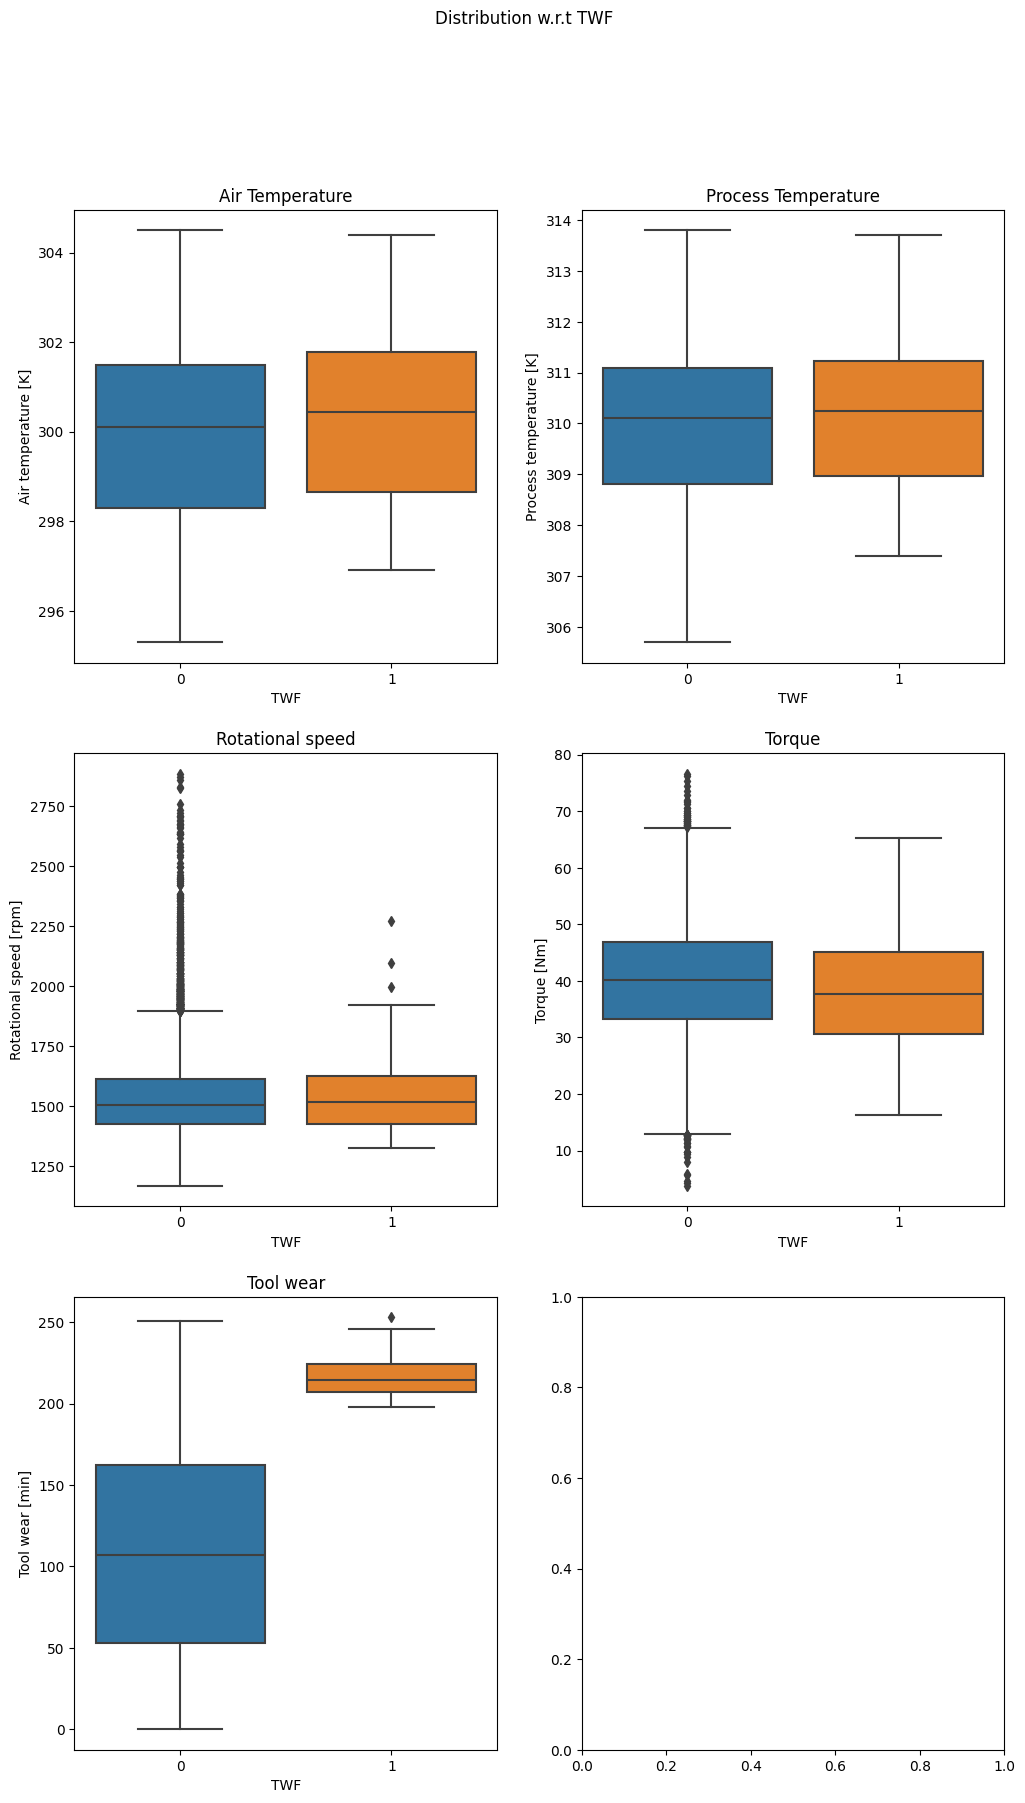

In [19]:
fig, axes = plt.subplots(3, 2,figsize=(12,20))
a1 = sns.boxplot(df, y="Air temperature [K]", x="TWF", ax=axes[0,0])
a2 = sns.boxplot(df, y="Process temperature [K]", x="TWF", ax=axes[0,1])
a3 = sns.boxplot(df, y="Rotational speed [rpm]", x="TWF", ax=axes[1,0])
a4 = sns.boxplot(df, y="Torque [Nm]", x="TWF", ax=axes[1,1])
a5 = sns.boxplot(df, y="Tool wear [min]", x="TWF", ax=axes[2,0])

a1.set_title("Air Temperature")
a2.set_title("Process Temperature")
a3.set_title("Rotational speed")
a4.set_title("Torque")
a5.set_title("Tool wear")
fig.suptitle("Distribution w.r.t TWF")

Text(0.5, 0.98, 'Distribution w.r.t Machine failure')

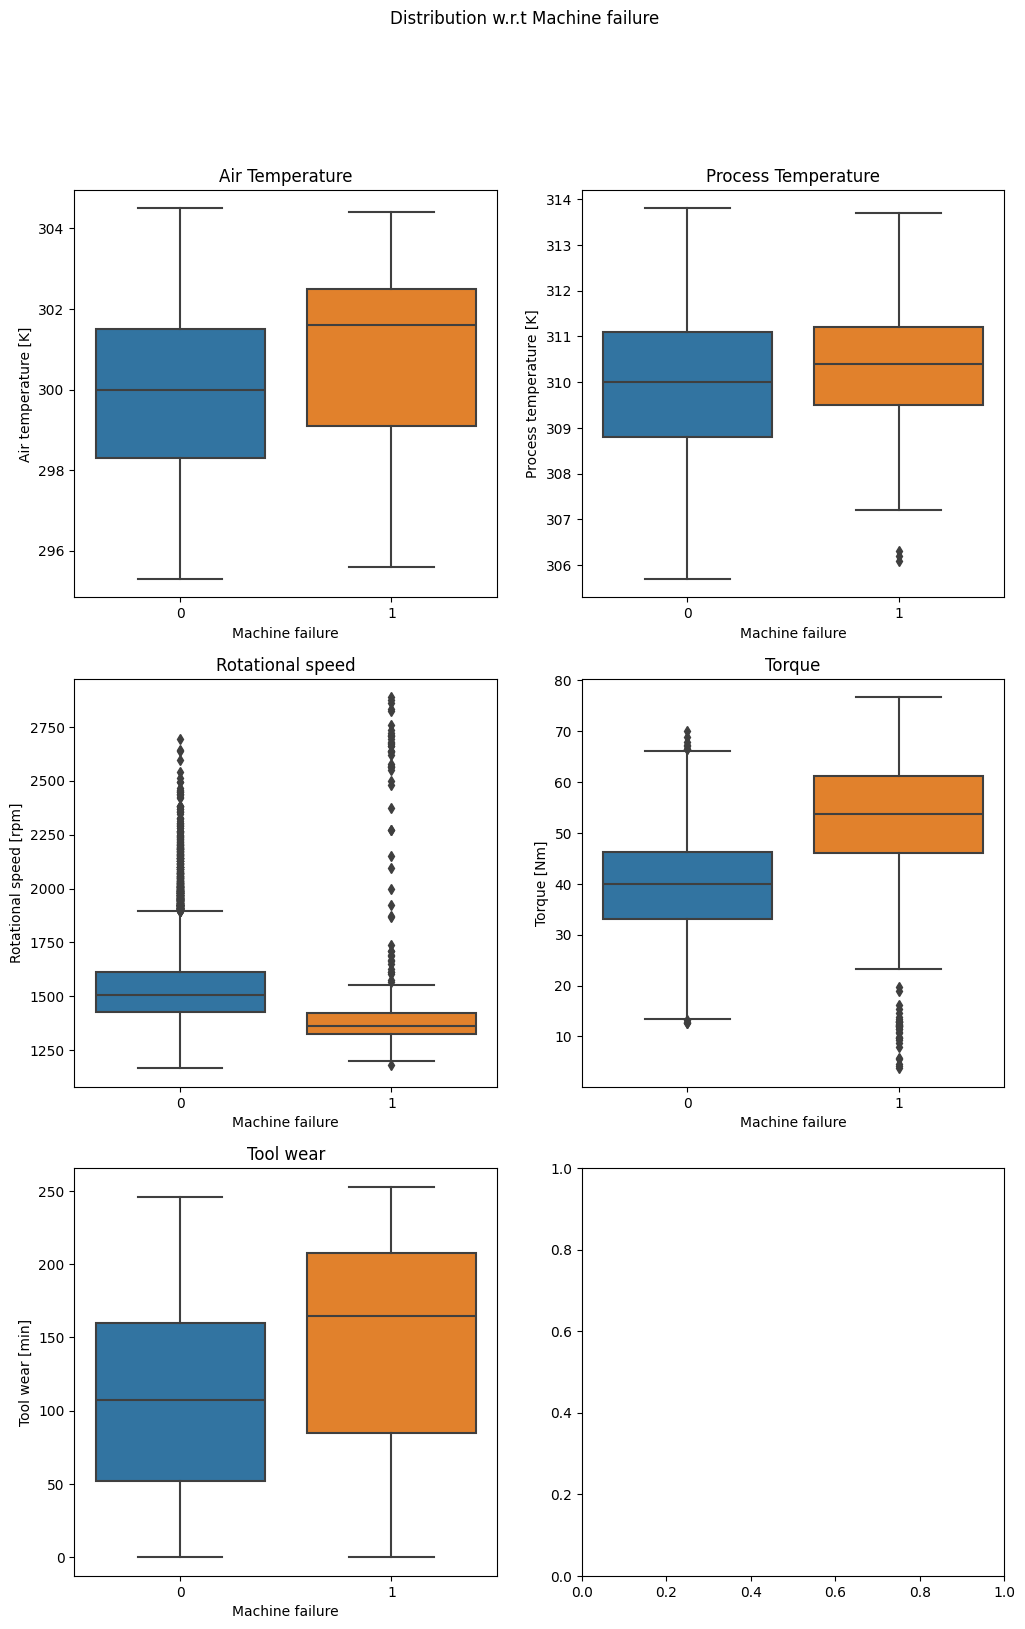

In [20]:
fig, axes = plt.subplots(3, 2,figsize=(12,18))
a1 = sns.boxplot(df, y="Air temperature [K]", x="Machine failure", ax=axes[0,0])
a2 = sns.boxplot(df, y="Process temperature [K]", x="Machine failure", ax=axes[0,1])
a3 = sns.boxplot(df, y="Rotational speed [rpm]", x="Machine failure", ax=axes[1,0])
a4 = sns.boxplot(df, y="Torque [Nm]", x="Machine failure", ax=axes[1,1])
a5 = sns.boxplot(df, y="Tool wear [min]", x="Machine failure", ax=axes[2,0])

a1.set_title("Air Temperature")
a2.set_title("Process Temperature")
a3.set_title("Rotational speed")
a4.set_title("Torque")
a5.set_title("Tool wear")
fig.suptitle("Distribution w.r.t Machine failure")

Text(0.5, 0.98, 'Distribution w.r.t HDF')

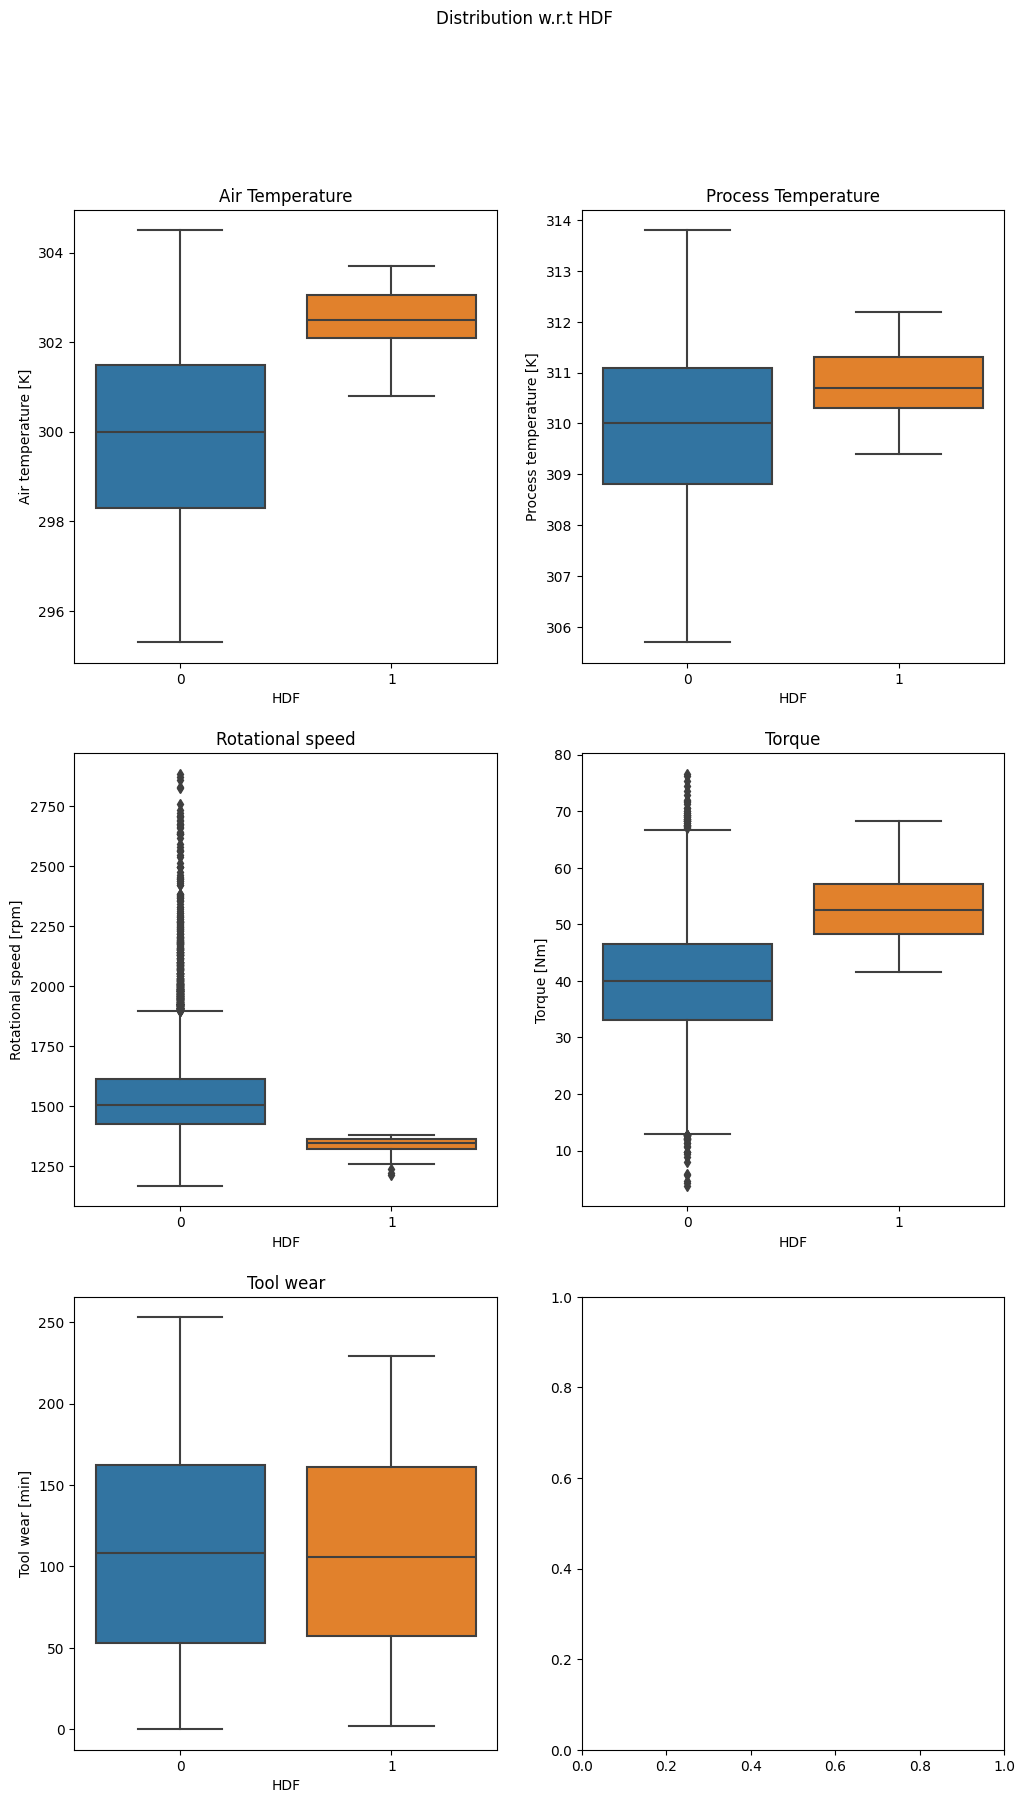

In [21]:
fig, axes = plt.subplots(3, 2,figsize=(12,20))
a1 = sns.boxplot(df, y="Air temperature [K]", x="HDF", ax=axes[0,0])
a2 = sns.boxplot(df, y="Process temperature [K]", x="HDF", ax=axes[0,1])
a3 = sns.boxplot(df, y="Rotational speed [rpm]", x="HDF", ax=axes[1,0])
a4 = sns.boxplot(df, y="Torque [Nm]", x="HDF", ax=axes[1,1])
a5 = sns.boxplot(df, y="Tool wear [min]", x="HDF", ax=axes[2,0])

a1.set_title("Air Temperature")
a2.set_title("Process Temperature")
a3.set_title("Rotational speed")
a4.set_title("Torque")
a5.set_title("Tool wear")
fig.suptitle("Distribution w.r.t HDF")

Text(0.5, 0.98, 'Distribution w.r.t PWF')

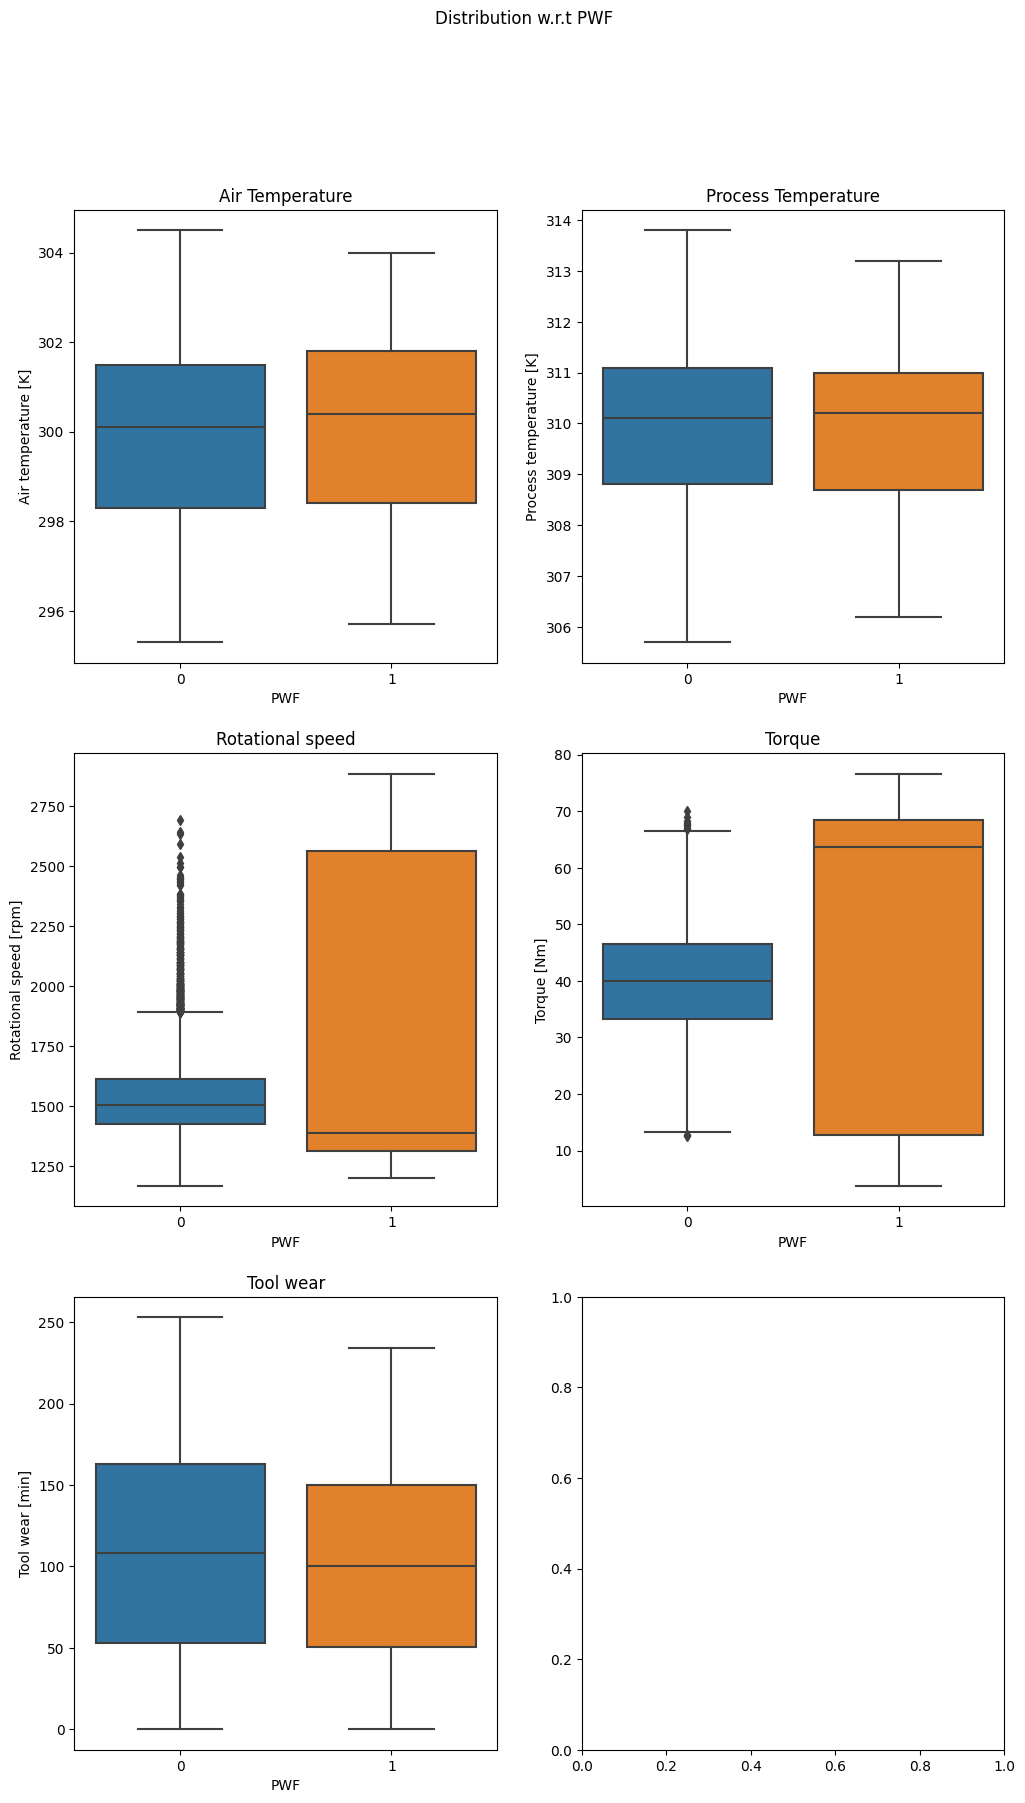

In [22]:
fig, axes = plt.subplots(3, 2,figsize=(12,20))
a1 = sns.boxplot(df, y="Air temperature [K]", x="PWF", ax=axes[0,0])
a2 = sns.boxplot(df, y="Process temperature [K]", x="PWF", ax=axes[0,1])
a3 = sns.boxplot(df, y="Rotational speed [rpm]", x="PWF", ax=axes[1,0])
a4 = sns.boxplot(df, y="Torque [Nm]", x="PWF", ax=axes[1,1])
a5 = sns.boxplot(df, y="Tool wear [min]", x="PWF", ax=axes[2,0])

a1.set_title("Air Temperature")
a2.set_title("Process Temperature")
a3.set_title("Rotational speed")
a4.set_title("Torque")
a5.set_title("Tool wear")
fig.suptitle("Distribution w.r.t PWF")

Text(0.5, 0.98, 'Distribution w.r.t OSF')

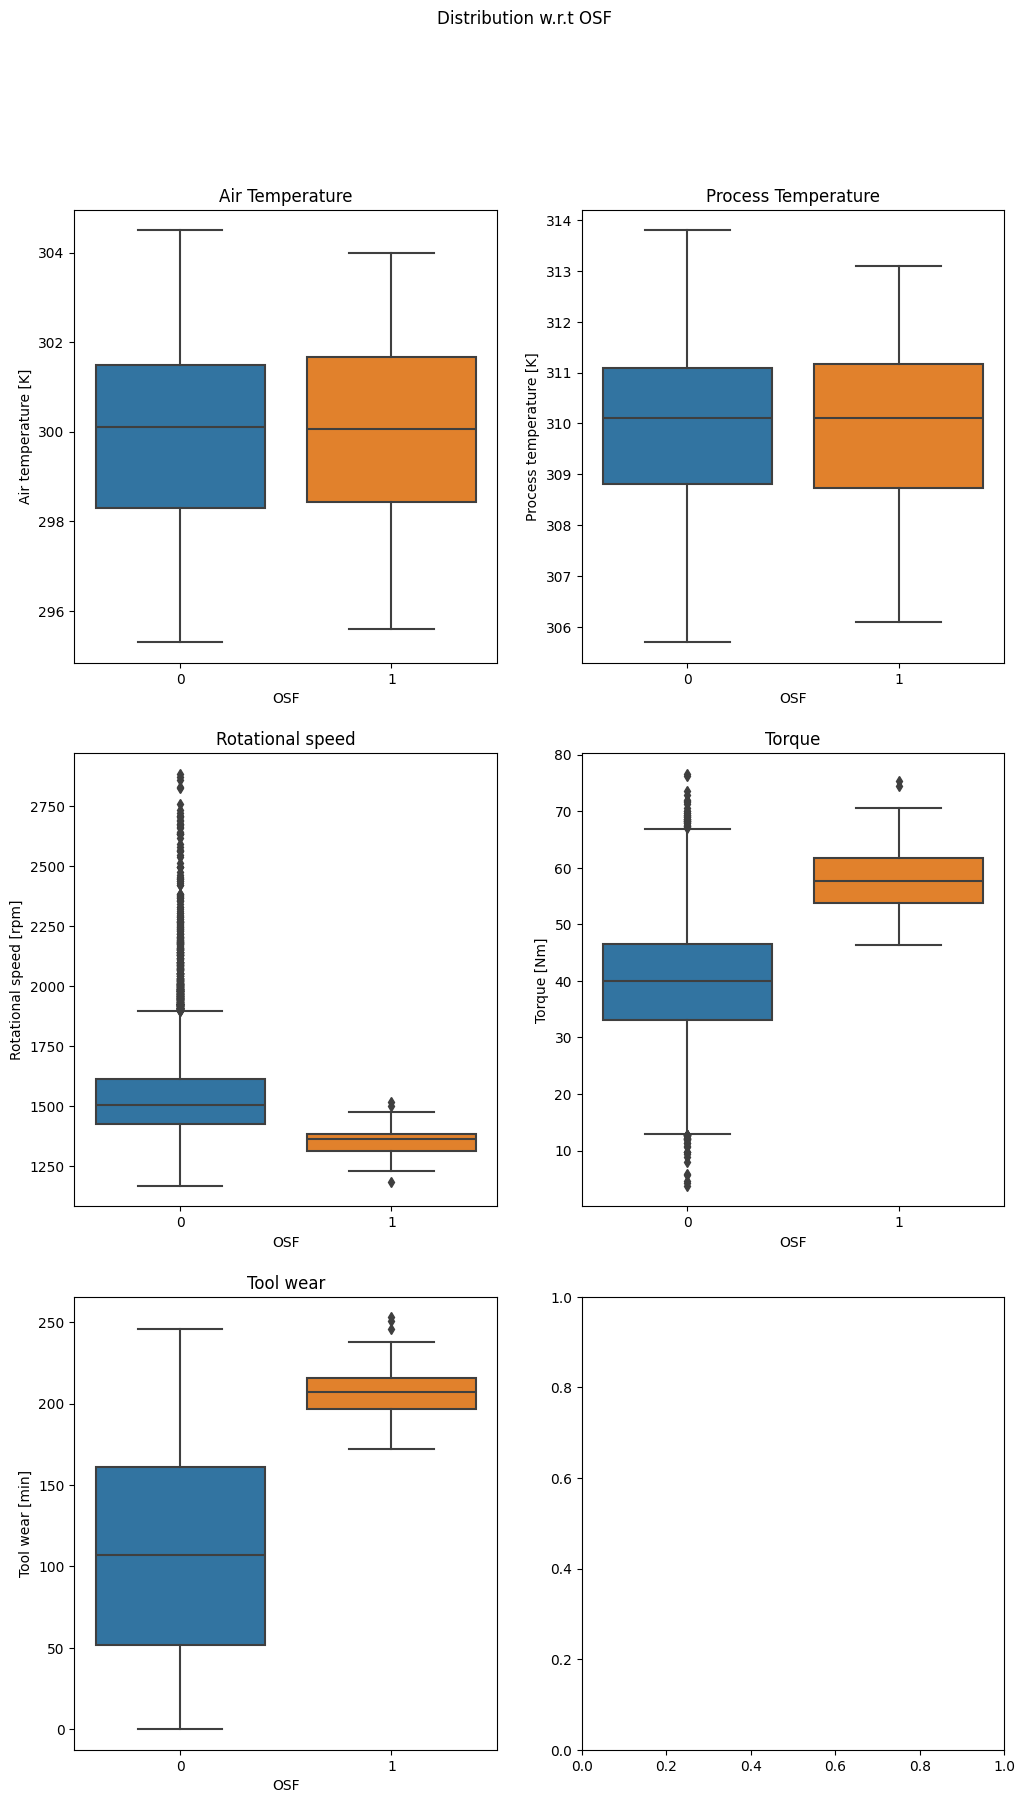

In [23]:
fig, axes = plt.subplots(3, 2,figsize=(12,20))
a1 = sns.boxplot(df, y="Air temperature [K]", x="OSF", ax=axes[0,0])
a2 = sns.boxplot(df, y="Process temperature [K]", x="OSF", ax=axes[0,1])
a3 = sns.boxplot(df, y="Rotational speed [rpm]", x="OSF", ax=axes[1,0])
a4 = sns.boxplot(df, y="Torque [Nm]", x="OSF", ax=axes[1,1])
a5 = sns.boxplot(df, y="Tool wear [min]", x="OSF", ax=axes[2,0])

a1.set_title("Air Temperature")
a2.set_title("Process Temperature")
a3.set_title("Rotational speed")
a4.set_title("Torque")
a5.set_title("Tool wear")
fig.suptitle("Distribution w.r.t OSF")

Text(0.5, 0.98, 'Distribution w.r.t RNF')

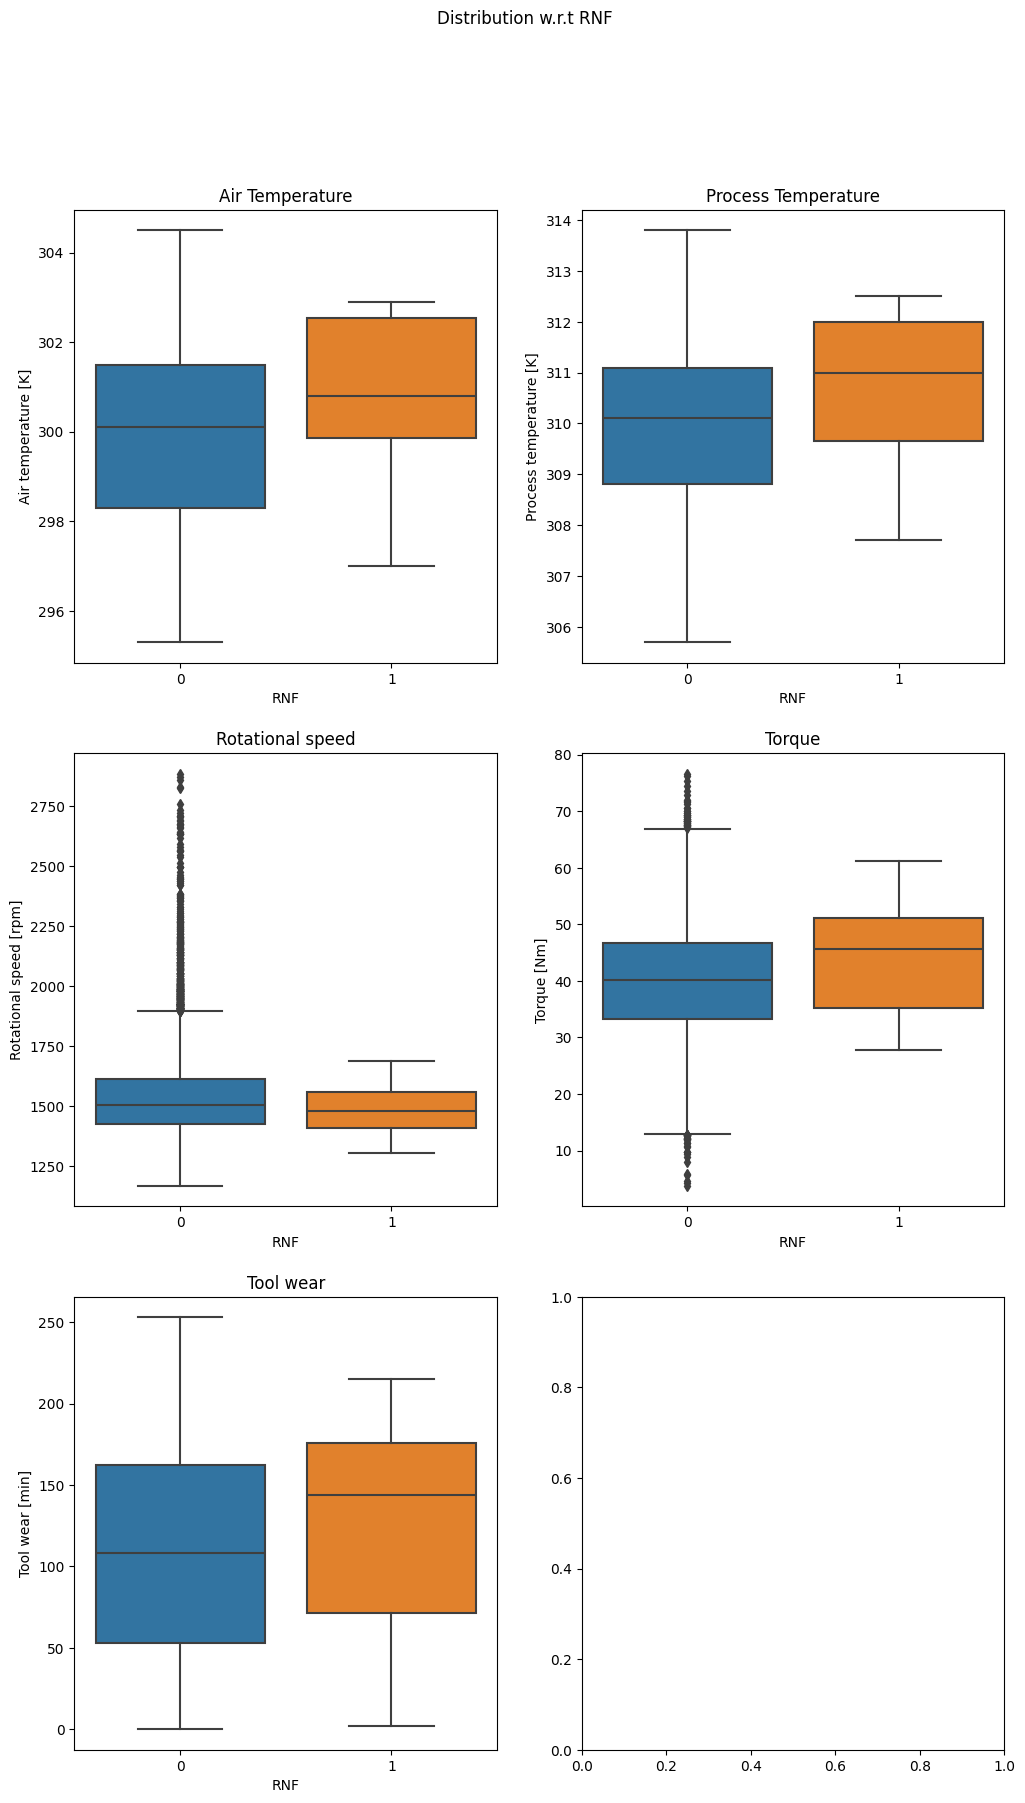

In [24]:
fig, axes = plt.subplots(3, 2,figsize=(12,20))
a1 = sns.boxplot(df, y="Air temperature [K]", x="RNF", ax=axes[0,0])
a2 = sns.boxplot(df, y="Process temperature [K]", x="RNF", ax=axes[0,1])
a3 = sns.boxplot(df, y="Rotational speed [rpm]", x="RNF", ax=axes[1,0])
a4 = sns.boxplot(df, y="Torque [Nm]", x="RNF", ax=axes[1,1])
a5 = sns.boxplot(df, y="Tool wear [min]", x="RNF", ax=axes[2,0])

a1.set_title("Air Temperature")
a2.set_title("Process Temperature")
a3.set_title("Rotational speed")
a4.set_title("Torque")
a5.set_title("Tool wear")
fig.suptitle("Distribution w.r.t RNF")

Text(0.5, 0.98, 'Frequency Distribution w.r.t TWF')

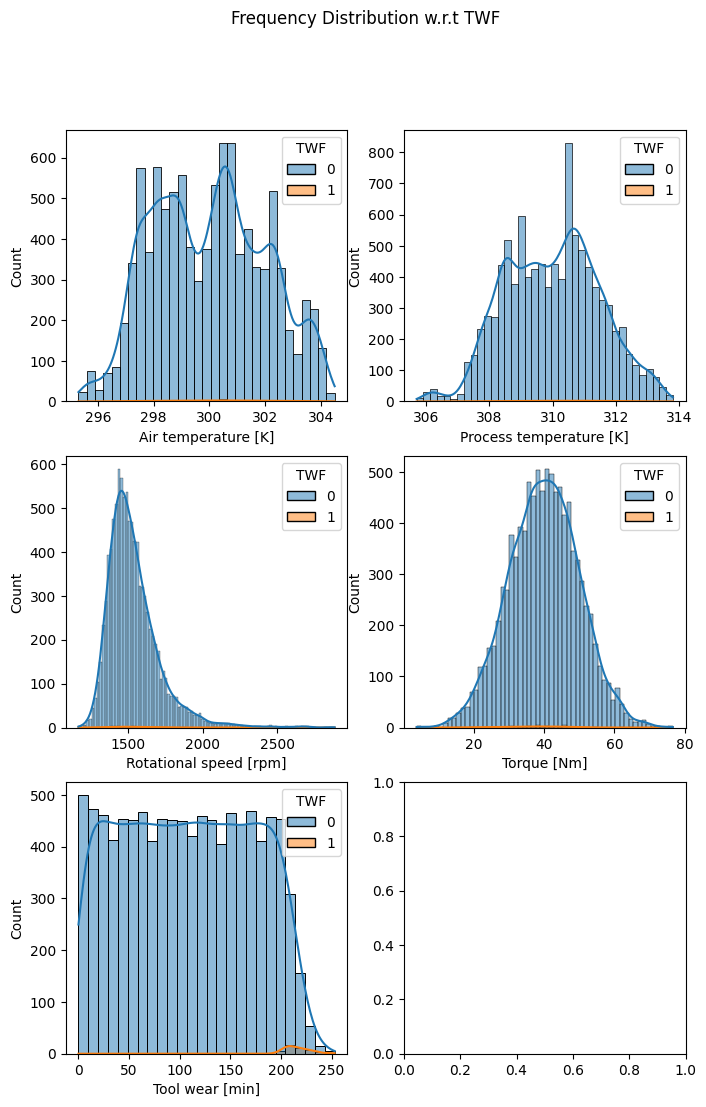

In [25]:
fig, axes = plt.subplots(3, 2,figsize=(8,12))
sns.histplot(df, x="Air temperature [K]", hue="TWF", kde=True, ax=axes[0,0])
sns.histplot(df, x="Process temperature [K]", hue="TWF", kde=True, ax=axes[0,1])
sns.histplot(df, x="Rotational speed [rpm]", hue="TWF", kde=True, ax=axes[1,0])
sns.histplot(df, x="Torque [Nm]", hue="TWF", kde=True, ax=axes[1,1])
sns.histplot(df, x="Tool wear [min]", hue="TWF", kde=True, ax=axes[2,0])
fig.suptitle("Frequency Distribution w.r.t TWF")

Text(0.5, 0.98, 'Frequency Distribution w.r.t Machine failure')

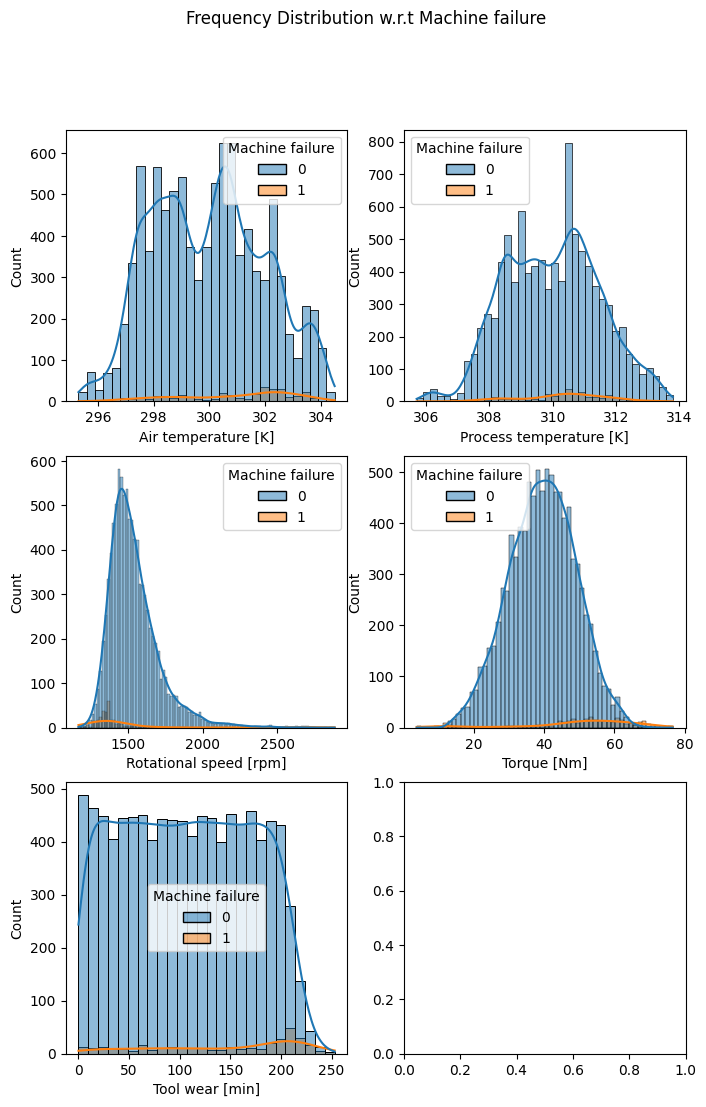

In [26]:
fig, axes = plt.subplots(3, 2,figsize=(8,12))
sns.histplot(df, x="Air temperature [K]", hue="Machine failure", kde=True, ax=axes[0,0])
sns.histplot(df, x="Process temperature [K]", hue="Machine failure", kde=True, ax=axes[0,1])
sns.histplot(df, x="Rotational speed [rpm]", hue="Machine failure", kde=True, ax=axes[1,0])
sns.histplot(df, x="Torque [Nm]", hue="Machine failure", kde=True, ax=axes[1,1])
sns.histplot(df, x="Tool wear [min]", hue="Machine failure", kde=True,ax=axes[2,0])
fig.suptitle("Frequency Distribution w.r.t Machine failure")

Text(0.5, 0.98, 'Frequency Distribution w.r.t PWF')

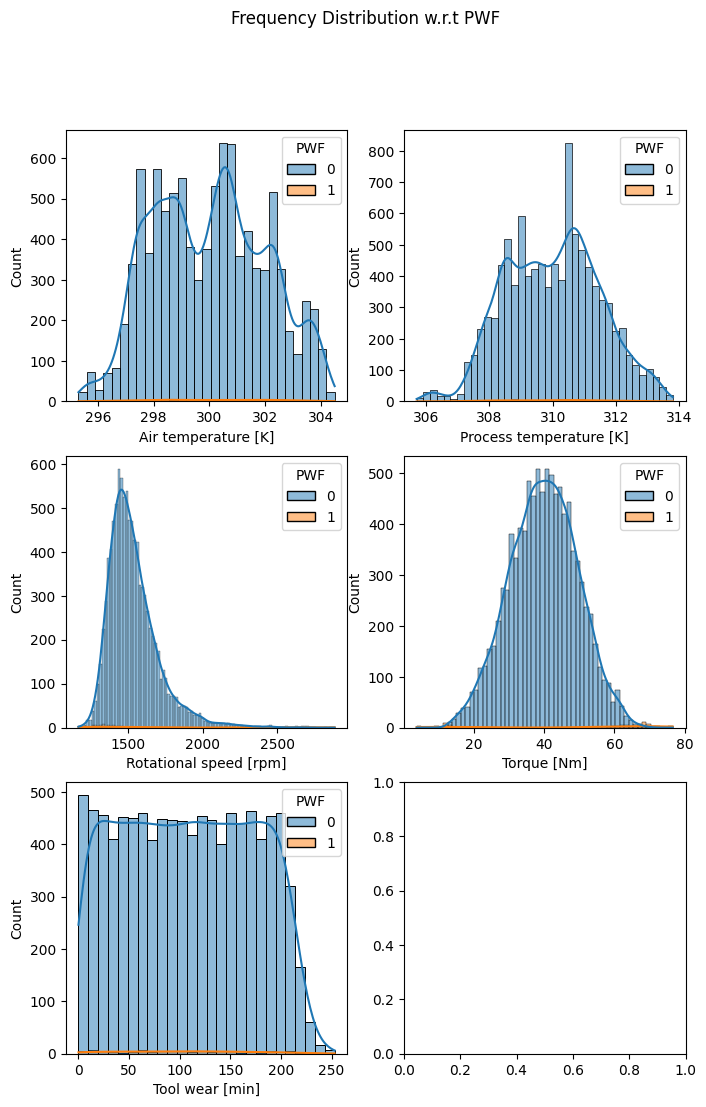

In [27]:
fig, axes = plt.subplots(3, 2,figsize=(8,12))
sns.histplot(df, x="Air temperature [K]", hue="PWF", kde=True, ax=axes[0,0])
sns.histplot(df, x="Process temperature [K]", hue="PWF", kde=True, ax=axes[0,1])
sns.histplot(df, x="Rotational speed [rpm]", hue="PWF", kde=True, ax=axes[1,0])
sns.histplot(df, x="Torque [Nm]", hue="PWF", kde=True, ax=axes[1,1])
sns.histplot(df, x="Tool wear [min]", hue="PWF",kde=True, ax=axes[2,0])
fig.suptitle("Frequency Distribution w.r.t PWF")

Text(0.5, 0.98, 'Frequency Distribution w.r.t OSF')

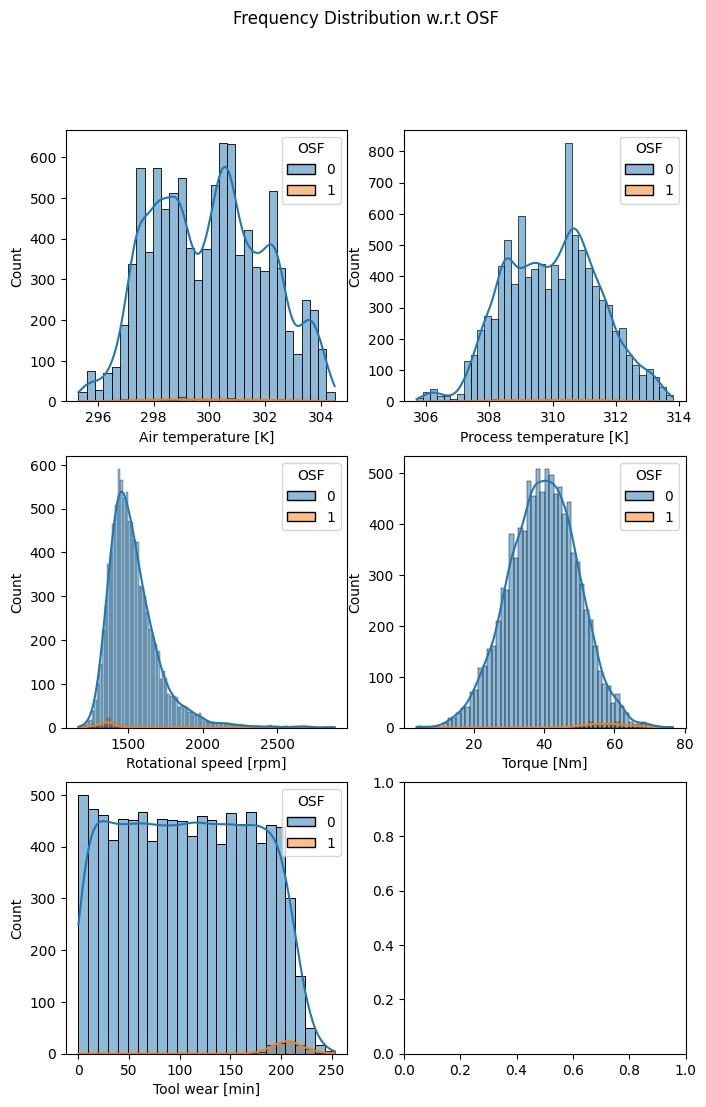

In [28]:
fig, axes = plt.subplots(3, 2,figsize=(8,12))
sns.histplot(df, x="Air temperature [K]", hue="OSF", kde=True, ax=axes[0,0])
sns.histplot(df, x="Process temperature [K]", hue="OSF", kde=True, ax=axes[0,1])
sns.histplot(df, x="Rotational speed [rpm]", hue="OSF", kde=True, ax=axes[1,0])
sns.histplot(df, x="Torque [Nm]", hue="OSF", kde=True, ax=axes[1,1])
sns.histplot(df, x="Tool wear [min]", hue="OSF", kde=True,ax=axes[2,0])
fig.suptitle("Frequency Distribution w.r.t OSF")

Text(0.5, 0.98, 'Frequency Distribution w.r.t RNF')

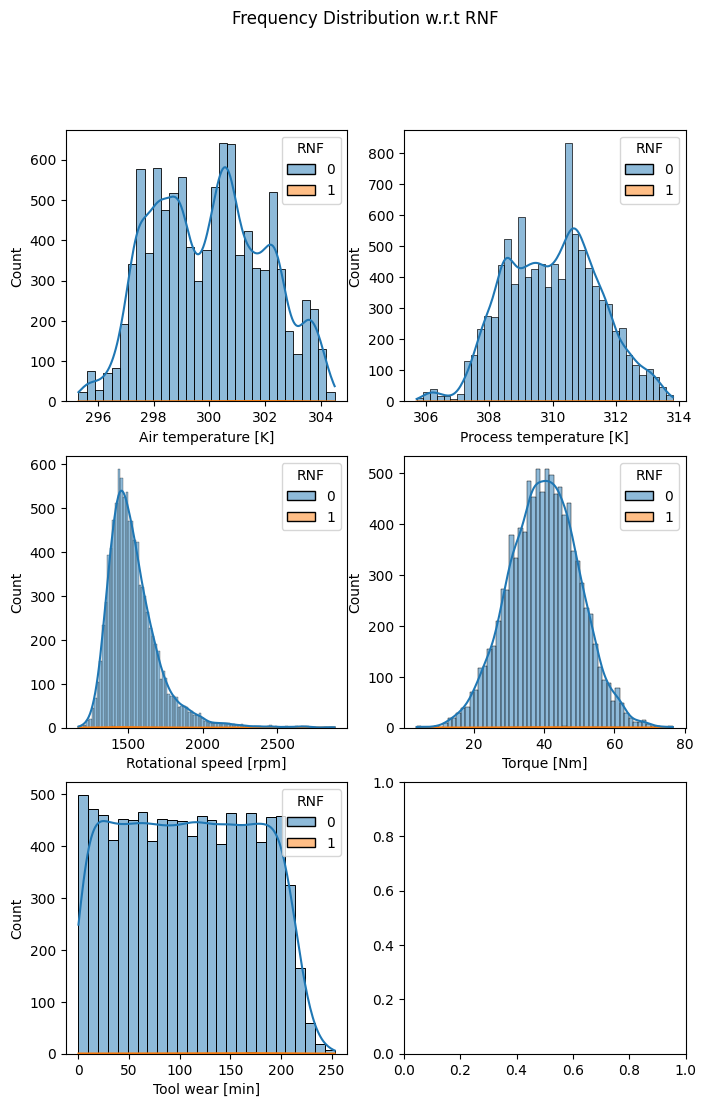

In [29]:
fig, axes = plt.subplots(3, 2,figsize=(8,12))
sns.histplot(df, x="Air temperature [K]", hue="RNF", kde=True, ax=axes[0,0])
sns.histplot(df, x="Process temperature [K]", hue="RNF", kde=True, ax=axes[0,1])
sns.histplot(df, x="Rotational speed [rpm]", hue="RNF", kde=True, ax=axes[1,0])
sns.histplot(df, x="Torque [Nm]", hue="RNF", kde=True, ax=axes[1,1])
sns.histplot(df, x="Tool wear [min]", hue="RNF",kde=True, ax=axes[2,0])
fig.suptitle("Frequency Distribution w.r.t RNF")

Text(0.5, 0.98, 'Frequency Distribution w.r.t HDF')

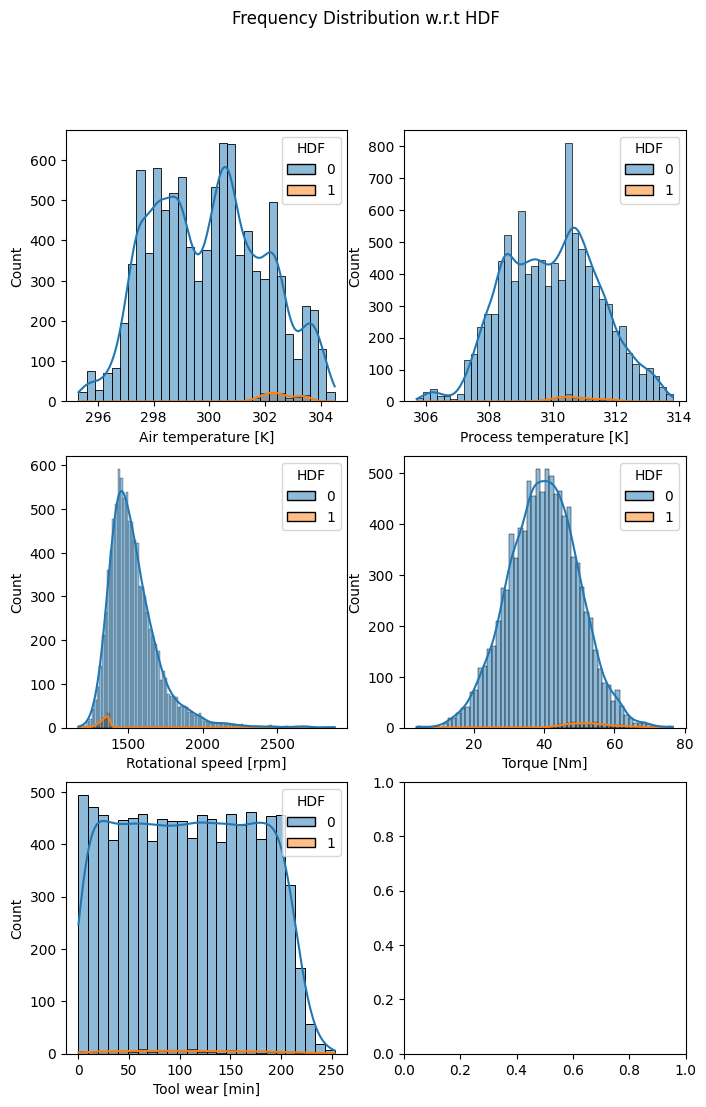

In [30]:
fig, axes = plt.subplots(3, 2,figsize=(8,12))
sns.histplot(df, x="Air temperature [K]", hue="HDF", kde=True, ax=axes[0,0])
sns.histplot(df, x="Process temperature [K]", hue="HDF", kde=True, ax=axes[0,1])
sns.histplot(df, x="Rotational speed [rpm]", hue="HDF", kde=True, ax=axes[1,0])
sns.histplot(df, x="Torque [Nm]", hue="HDF", kde=True, ax=axes[1,1])
sns.histplot(df, x="Tool wear [min]", hue="HDF", kde=True,ax=axes[2,0])
fig.suptitle("Frequency Distribution w.r.t HDF")

# Correlation analysis

<Axes: >

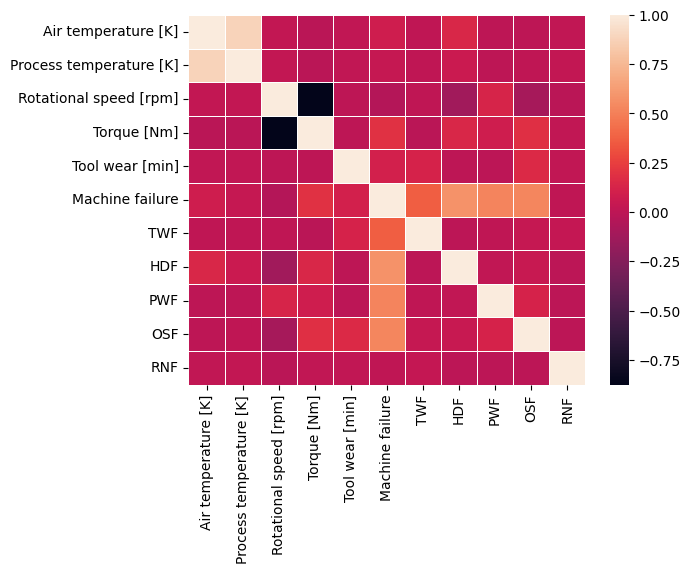

In [31]:
sns.heatmap(df.corr(),cbar=True,linewidth=0.6)

# Splitting Dataset

In [32]:
X = df.drop(['TWF','HDF','Machine failure','PWF','RNF','OSF'],axis=1)
X

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                   298.1                    308.6                    1551   
1                   298.2                    308.7                    1408   
2                   298.1                    308.5                    1498   
3                   298.2                    308.6                    1433   
4                   298.2                    308.7                    1408   
...                   ...                      ...                     ...   
9995                298.8                    308.4                    1604   
9996                298.9                    308.4                    1632   
9997                299.0                    308.6                    1645   
9998                299.0                    308.7                    1408   
9999                299.0                    308.7                    1500   

      Torque [Nm]  Tool wear [min]  
0            42.8                0  
1            46.3                3  
2            49.4                5  
3            39.5                7  
4            40.0                9  
...           ...              ...  
9995         29.5               14  
9996         31.8               17  
9997         33.4               22  
9998         48.5               25  
9999         40.2               30  

[10000 rows x 5 columns]

In [33]:
y = df.iloc[:,5:11]
y

Machine failure  TWF  HDF  PWF  OSF  RNF
0                   0    0    0    0    0    0
1                   0    0    0    0    0    0
2                   0    0    0    0    0    0
3                   0    0    0    0    0    0
4                   0    0    0    0    0    0
...               ...  ...  ...  ...  ...  ...
9995                0    0    0    0    0    0
9996                0    0    0    0    0    0
9997                0    0    0    0    0    0
9998                0    0    0    0    0    0
9999                0    0    0    0    0    0

[10000 rows x 6 columns]

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
9254                298.3                    309.1                    1616   
1561                298.2                    308.4                    1388   
1670                298.2                    307.8                    1528   
6087                300.9                    310.8                    1599   
6669                301.4                    310.5                    1571   
...                   ...                      ...                     ...   
5734                302.3                    311.8                    1369   
5191                304.0                    313.2                    1416   
5390                302.8                    312.3                    1483   
860                 296.1                    306.9                    1541   
7270                300.2                    310.4                    1808   

      Torque [Nm]  Tool wear [min]  
9254         31.1              195  
1561         53.8              137  
1670         31.1              194  
6087         33.0                7  
6669         33.9              208  
...           ...              ...  
5734         56.2              208  
5191         46.0              128  
5390         47.2              223  
860          32.6               33  
7270         25.8               35  

[8000 rows x 5 columns]

# Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train

array([[-0.85406604, -0.60958879,  0.42763418, -0.89269644,  1.37503539],
       [-0.90401361, -1.08052803, -0.83494457,  1.38218727,  0.45762016],
       [-0.90401361, -1.48419023, -0.05967692, -0.89269644,  1.35921788],
       ...,
       [ 1.39357475,  1.54327629, -0.30887009,  0.72076734,  1.81792549],
       [-1.95291265, -2.08968354,  0.01231222, -0.74237372, -1.18740025],
       [ 0.09493785,  0.26501265,  1.49085839, -1.42383669, -1.15576524]])

In [36]:
# train,X_train,y_train = scale_dataset(train,oversample=True)
# # validation and test datasets are for the purpose of testing the model on unseen data,
# # for that we don't need to oversample,we need to keep it raw
# valid,X_valid,y_valid = scale_dataset(valid,oversample=False)
# test,X_test,y_test = scale_dataset(test,oversample=False)

# Model Building

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

lgr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
rfc = rf_classifier = RandomForestClassifier()
gnb = GaussianNB()
xgb = XGBClassifier()
from sklearn.multioutput import MultiOutputClassifier
model_lgr = MultiOutputClassifier(lgr)
model_knn = MultiOutputClassifier(knn)
model_svc = MultiOutputClassifier(svc)
model_dtc = MultiOutputClassifier(dtc)
model_rfc = MultiOutputClassifier(rfc)
model_gnb = MultiOutputClassifier(gnb)
model_xgb = MultiOutputClassifier(xgb)

# Model Evaluation

In [38]:
def fit_model(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_pred1 = clf.predict(X_train)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='micro')
    f1 = f1_score(y_test,y_pred,average='micro')
    recall = recall_score(y_test,y_pred,average='micro')
    accuracy_1 = accuracy_score(y_train,y_pred1)
    precision_1 = precision_score(y_train,y_pred1,average='micro')
    f1_1 = f1_score(y_train,y_pred1,average='micro')
    recall_1 = recall_score(y_train,y_pred1,average='micro')
    return accuracy, precision, recall, f1,accuracy_1, precision_1, recall_1, f1_1

In [39]:
acc, prec, re, f1,acc_train, prec_train, re_train, f1_train = fit_model(model_lgr, X_train, X_test, y_train, y_test)
print("Logistic Regression:")
print("Test set")
print(f"Accuracy is : {acc}")
print(f"Precision is : {prec}")
print(f"Recall is : {re}")
print(f"F1 score is : {f1}")

Logistic Regression:
Test set
Accuracy is : 0.9665
Precision is : 0.7678571428571429
Recall is : 0.3233082706766917
F1 score is : 0.455026455026455


In [40]:
acc, prec, re, f1,acc_train, prec_train, re_train, f1_train = fit_model(model_knn, X_train, X_test, y_train, y_test)
print("K-Nearest Neighbors:")
print("Test set:")
print(f"Accuracy is : {acc}")
print(f"Precision is : {prec}")
print(f"Recall is : {re}")
print(f"F1 score is : {f1}")


K-Nearest Neighbors:
Test set:
Accuracy is : 0.9705
Precision is : 0.8181818181818182
Recall is : 0.2706766917293233
F1 score is : 0.4067796610169492


In [41]:
acc, prec, re, f1,acc_train, prec_train, re_train, f1_train = fit_model(model_svc, X_train, X_test, y_train, y_test)
print("Support Vector machine:")
print("Test set:")
print(f"Accuracy is : {acc}")
print(f"Precision is : {prec}")
print(f"Recall is : {re}")
print(f"F1 score is : {f1}")

Support Vector machine:
Test set:
Accuracy is : 0.9685
Precision is : 0.8205128205128205
Recall is : 0.24060150375939848
F1 score is : 0.37209302325581395


In [42]:
acc, prec, re, f1,acc_train, prec_train, re_train, f1_train = fit_model(model_dtc, X_train, X_test, y_train, y_test)
print("Decision Trees:")
print("Test set:")
print(f"Accuracy is : {acc}")
print(f"Precision is : {prec}")
print(f"Recall is : {re}")
print(f"F1 score is : {f1}")

Decision Trees:
Test set:
Accuracy is : 0.9605
Precision is : 0.6102941176470589
Recall is : 0.6240601503759399
F1 score is : 0.617100371747212


In [43]:
acc, prec, re, f1,acc_train, prec_train, re_train, f1_train = fit_model(model_rfc, X_train, X_test, y_train, y_test)
print("random forest classifier:")
print("Test set")
print(f"Accuracy is : {acc}")
print(f"Precision is : {prec}")
print(f"Recall is : {re}")
print(f"F1 score is : {f1}")

random forest classifier:
Test set
Accuracy is : 0.977
Precision is : 0.8690476190476191
Recall is : 0.5488721804511278
F1 score is : 0.6728110599078341


In [44]:
acc, prec, re, f1,acc_train, prec_train, re_train, f1_train = fit_model(model_gnb, X_train, X_test, y_train, y_test)
print("Naive Bayes:")
print("Test set:")
print(f"Accuracy is : {acc}")
print(f"Precision is : {prec}")
print(f"Recall is : {re}")
print(f"F1 score is : {f1}")

Naive Bayes:
Test set:
Accuracy is : 0.943
Precision is : 0.3412698412698413
Recall is : 0.3233082706766917
F1 score is : 0.332046332046332


In [45]:
acc, prec, re, f1,acc_train, prec_train, re_train, f1_train = fit_model(model_xgb, X_train, X_test, y_train, y_test)
print("XG boost Classifier:")
print("Test set:")
print(f"Accuracy is : {acc}")
print(f"Precision is : {prec}")
print(f"Recall is : {re}")
print(f"F1 score is : {f1}")

XG boost Classifier:
Test set:
Accuracy is : 0.9745
Precision is : 0.8488372093023255
Recall is : 0.5488721804511278
F1 score is : 0.6666666666666666


# Applying Voting Classifier

In [46]:
from sklearn.ensemble import VotingClassifier

In [47]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',gnb),('lgr',lgr),('knn',knn),('dtc',dtc),('rfc',rfc),('xgb',xgb)],voting='hard')

In [48]:
model_voting = MultiOutputClassifier(voting)

In [49]:
acc, prec, re, f1,acc_train, prec_train, re_train, f1_train = fit_model(model_knn, X_train, X_test, y_train, y_test)
print("Voting Classifier:")
print("Test set:")
print(f"Accuracy is : {acc}")
print(f"Precision is : {prec}")
print(f"Recall is : {re}")
print(f"F1 score is : {f1}")

Voting Classifier:
Test set:
Accuracy is : 0.9705
Precision is : 0.8181818181818182
Recall is : 0.2706766917293233
F1 score is : 0.4067796610169492


# Confusion matrix

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
model_lgr.fit(X_train,y_train)

MultiOutputClassifier(estimator=LogisticRegression())

In [52]:
y_pred = model_lgr.predict(X_test)

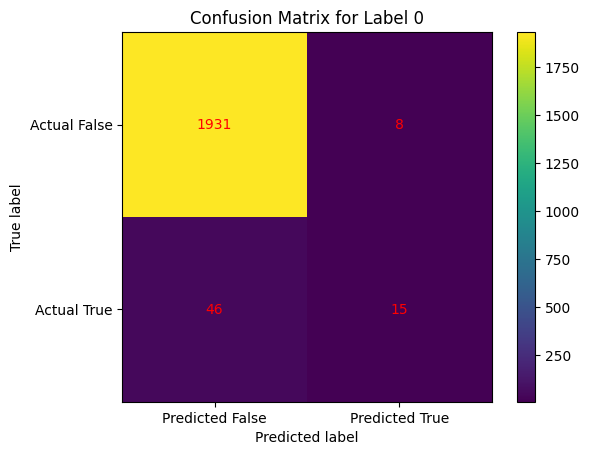

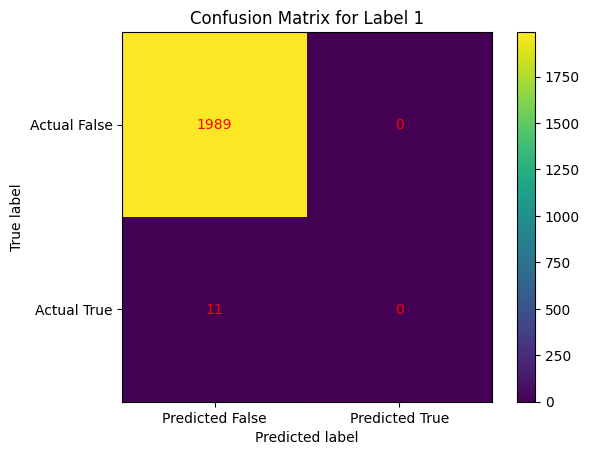

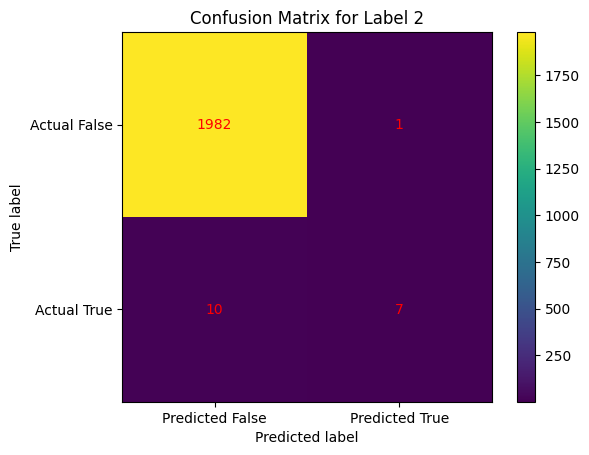

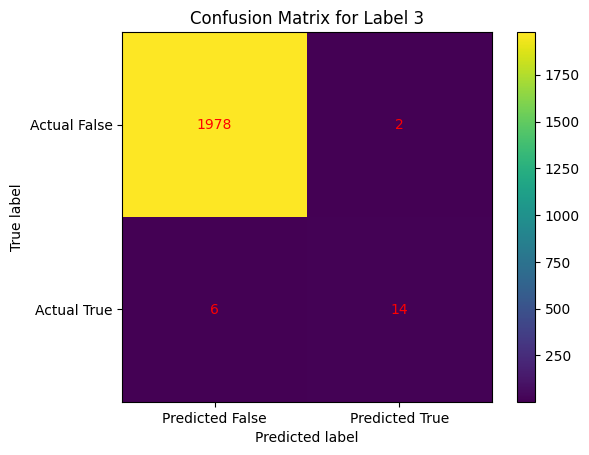

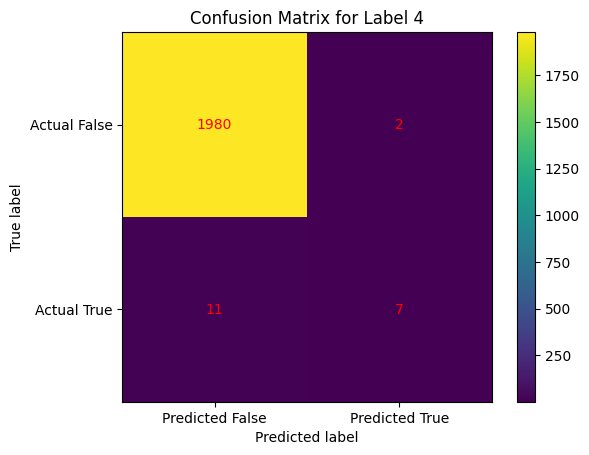

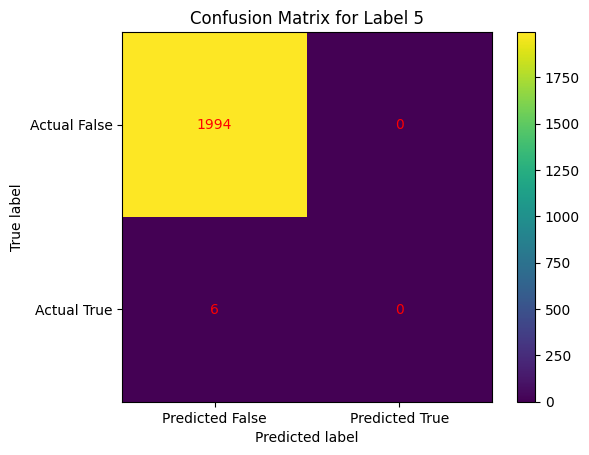

In [53]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are in a multilabel format
cm = multilabel_confusion_matrix(y_test, y_pred)

# Plot confusion matrices for each label
for i in range(len(cm)):
    plt.figure()
    plt.imshow(cm[i], interpolation='nearest')
    plt.title(f'Confusion Matrix for Label {i}')
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted False', 'Predicted True'])
    plt.yticks([0, 1], ['Actual False', 'Actual True'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    # Add annotations
    for j in range(2):  # Iterate over rows
        for k in range(2):  # Iterate over columns
            plt.text(k, j, str(cm[i][j][k]), ha='center', va='center', color='red')

    plt.show()


In [54]:
model_knn.fit(X_train,y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier())

In [55]:
model_svc.fit(X_train,y_train)

MultiOutputClassifier(estimator=SVC())

In [56]:
model_dtc.fit(X_train,y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier())

In [57]:
model_rfc.fit(X_train,y_train)

MultiOutputClassifier(estimator=RandomForestClassifier())

In [58]:
model_xgb.fit(X_train,y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

In [59]:
model_voting.fit(X_train,y_train)

MultiOutputClassifier(estimator=VotingClassifier(estimators=[('svm', SVC()),
                                                             ('nb',
                                                              GaussianNB()),
                                                             ('lgr',
                                                              LogisticRegression()),
                                                             ('knn',
                                                              KNeighborsClassifier()),
                                                             ('dtc',
                                                              DecisionTreeClassifier()),
                                                             ('rfc',
                                                              RandomForestClassifier()),
                                                             ('xgb',
                                                              XGBClassifier(base_score=None,
                                                                            booster=None,
                                                                            callbacks=None,
                                                                            colsample_bylevel=None,
                                                                            colsample_bynode=None,
                                                                            colsample_bytree=No...
                                                                            grow_policy=None,
                                                                            importance_type=None,
                                                                            interaction_constraints=None,
                                                                            learning_rate=None,
                                                                            max_bin=None,
                                                                            max_cat_threshold=None,
                                                                            max_cat_to_onehot=None,
                                                                            max_delta_step=None,
                                                                            max_depth=None,
                                                                            max_leaves=None,
                                                                            min_child_weight=None,
                                                                            missing=nan,
                                                                            monotone_constraints=None,
                                                                            multi_strategy=None,
                                                                            n_estimators=None,
                                                                            n_jobs=None,
                                                                            num_parallel_tree=None,
                                                                            random_state=None, ...))]))

In [60]:
y_pred = model_knn.predict(X_test)

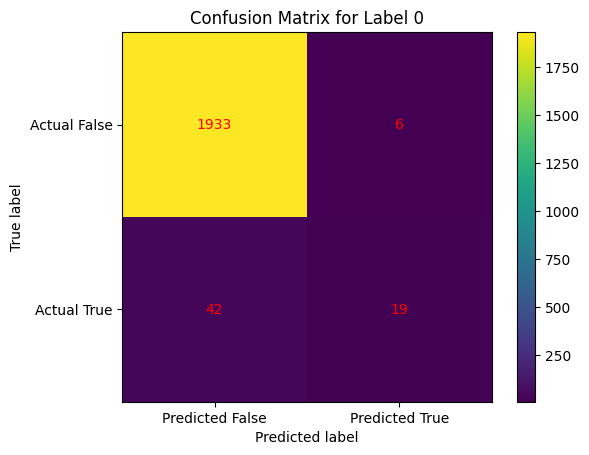

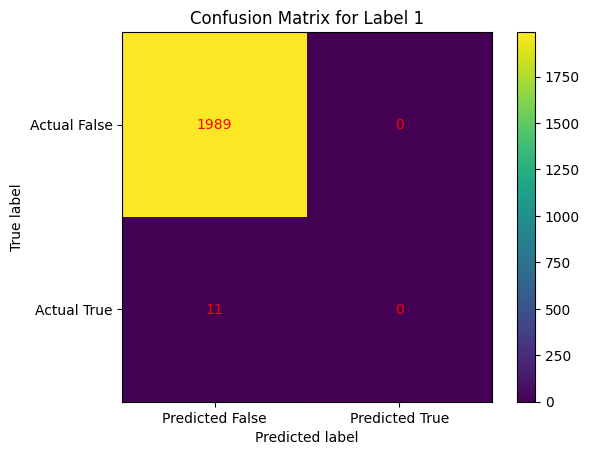

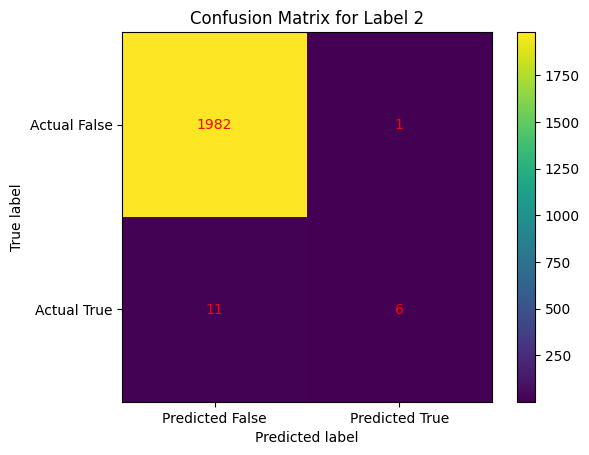

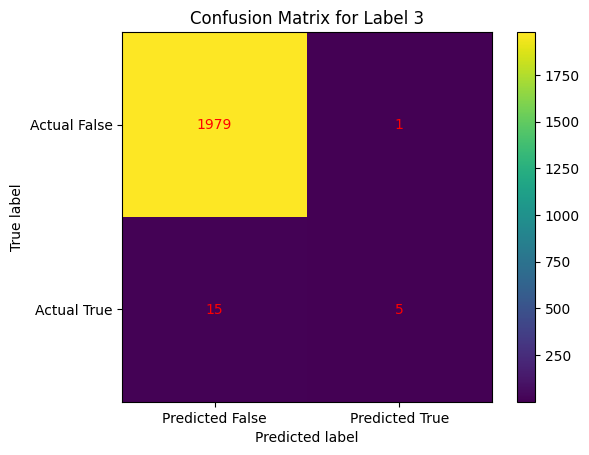

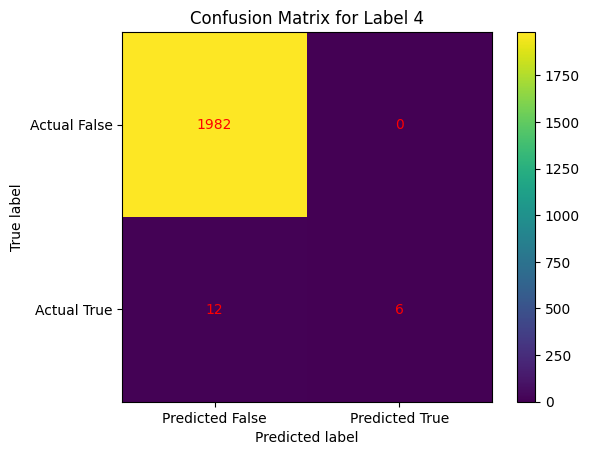

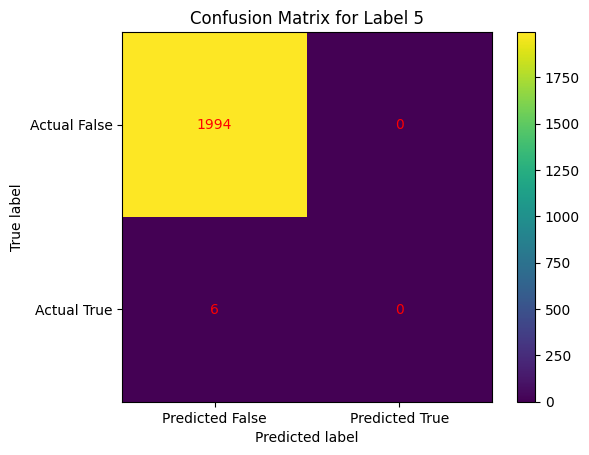

In [61]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are in a multilabel format
cm = multilabel_confusion_matrix(y_test, y_pred)

# Plot confusion matrices for each label
for i in range(len(cm)):
    plt.figure()
    plt.imshow(cm[i], interpolation='nearest')
    plt.title(f'Confusion Matrix for Label {i}')
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted False', 'Predicted True'])
    plt.yticks([0, 1], ['Actual False', 'Actual True'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    # Add annotations
    for j in range(2):  # Iterate over rows
        for k in range(2):  # Iterate over columns
            plt.text(k, j, str(cm[i][j][k]), ha='center', va='center', color='red')

    plt.show()


In [62]:
y_pred = model_svc.predict(X_test)

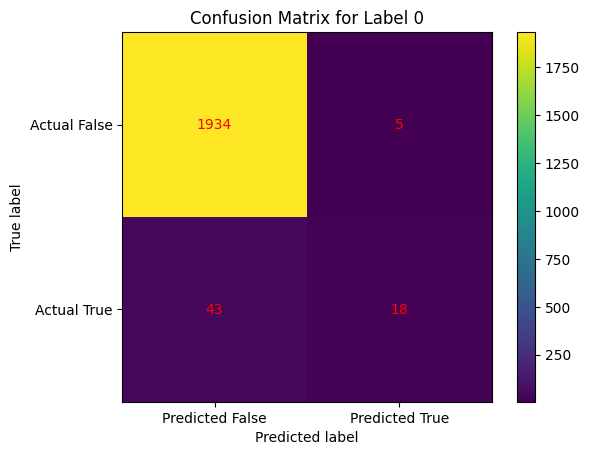

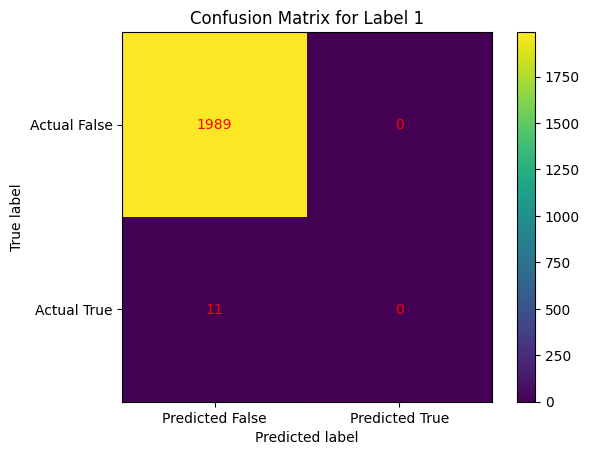

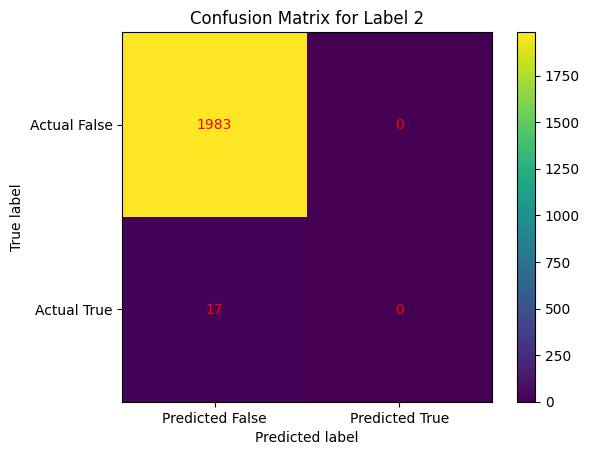

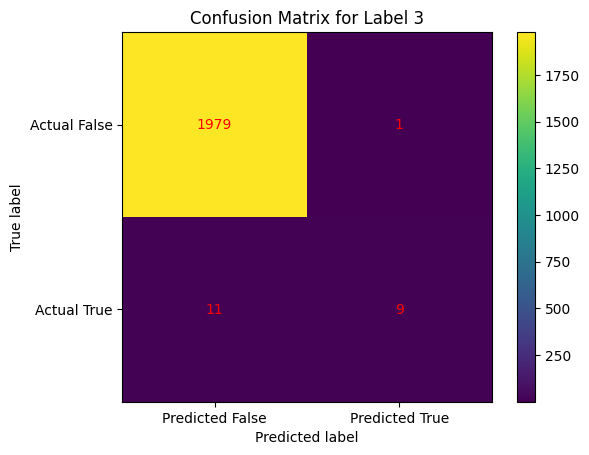

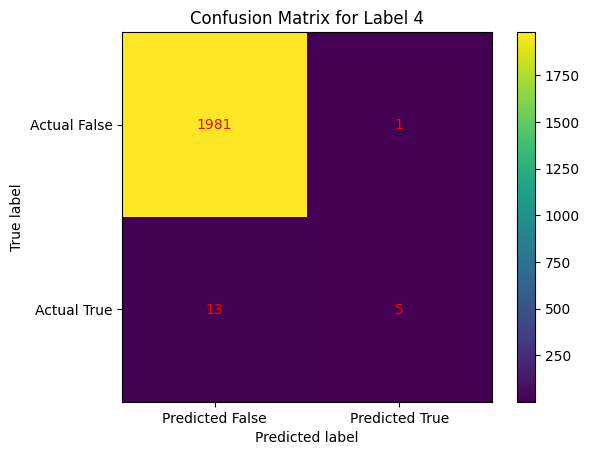

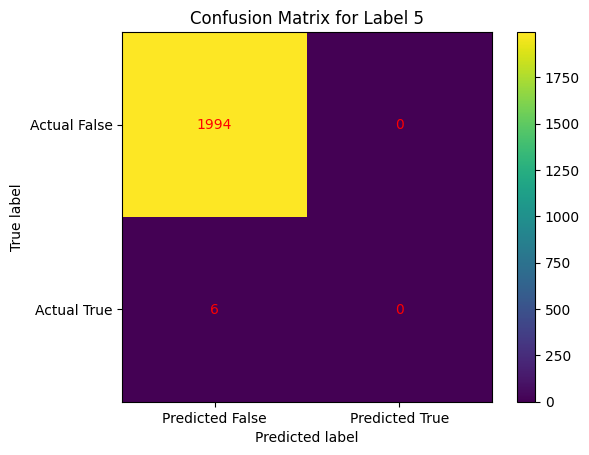

In [63]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are in a multilabel format
cm = multilabel_confusion_matrix(y_test, y_pred)

# Plot confusion matrices for each label
for i in range(len(cm)):
    plt.figure()
    plt.imshow(cm[i], interpolation='nearest')
    plt.title(f'Confusion Matrix for Label {i}')
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted False', 'Predicted True'])
    plt.yticks([0, 1], ['Actual False', 'Actual True'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    # Add annotations
    for j in range(2):  # Iterate over rows
        for k in range(2):  # Iterate over columns
            plt.text(k, j, str(cm[i][j][k]), ha='center', va='center', color='red')

    plt.show()


In [64]:
y_pred = model_dtc.predict(X_test)

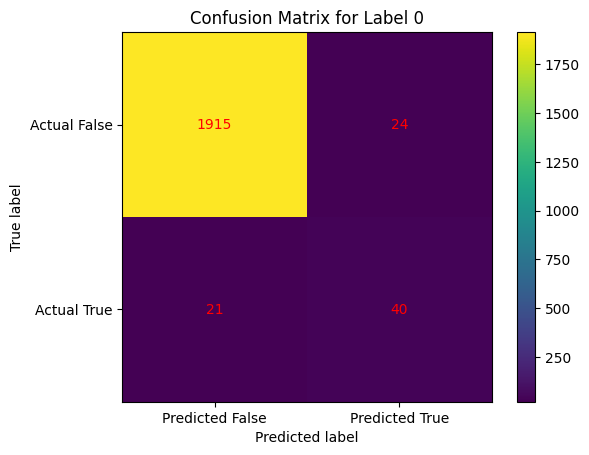

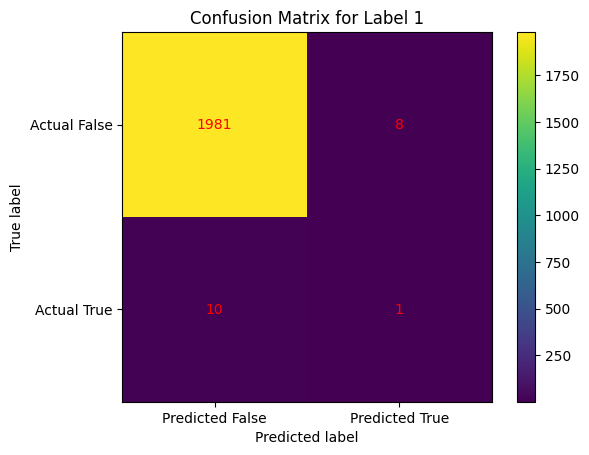

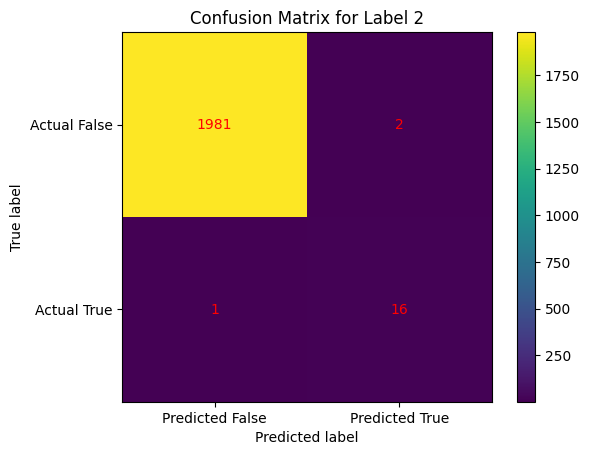

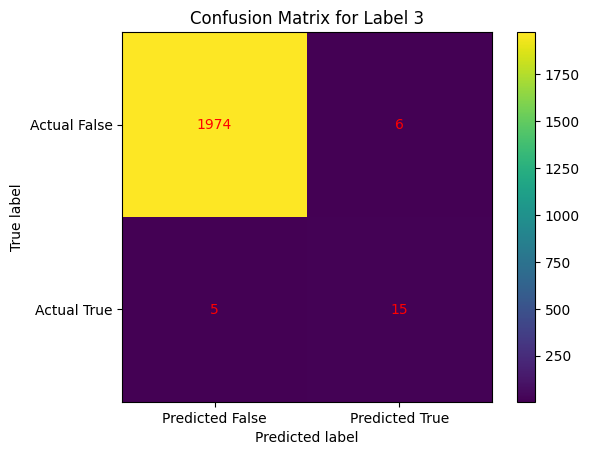

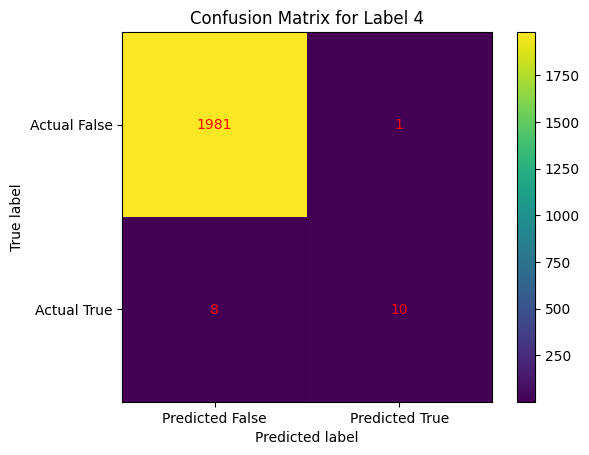

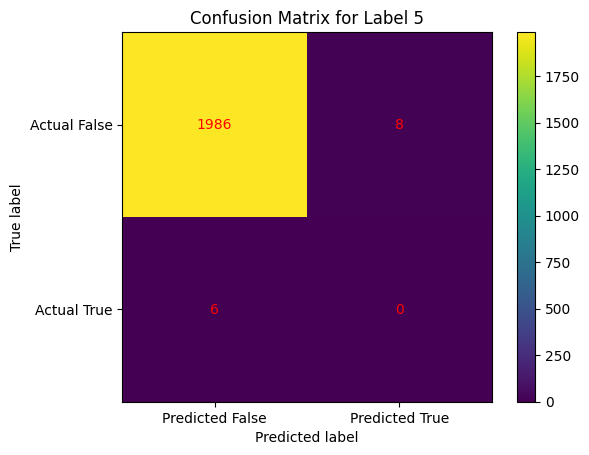

In [65]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are in a multilabel format
cm = multilabel_confusion_matrix(y_test, y_pred)

# Plot confusion matrices for each label
for i in range(len(cm)):
    plt.figure()
    plt.imshow(cm[i], interpolation='nearest')
    plt.title(f'Confusion Matrix for Label {i}')
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted False', 'Predicted True'])
    plt.yticks([0, 1], ['Actual False', 'Actual True'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    # Add annotations
    for j in range(2):  # Iterate over rows
        for k in range(2):  # Iterate over columns
            plt.text(k, j, str(cm[i][j][k]), ha='center', va='center', color='red')

    plt.show()


In [66]:
y_pred = model_xgb.predict(X_test)

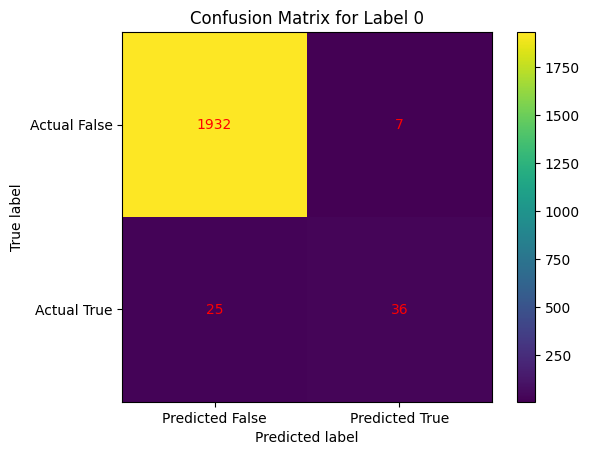

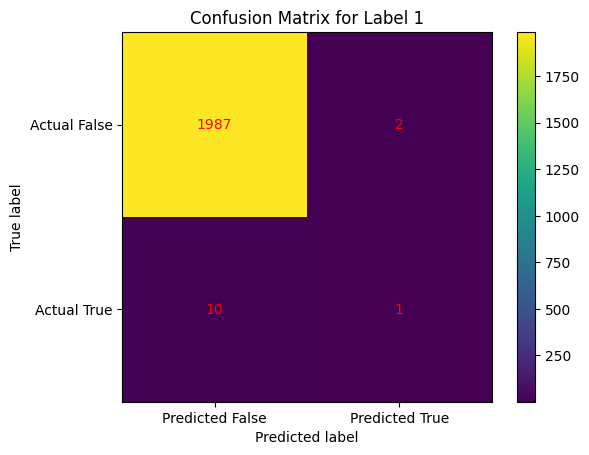

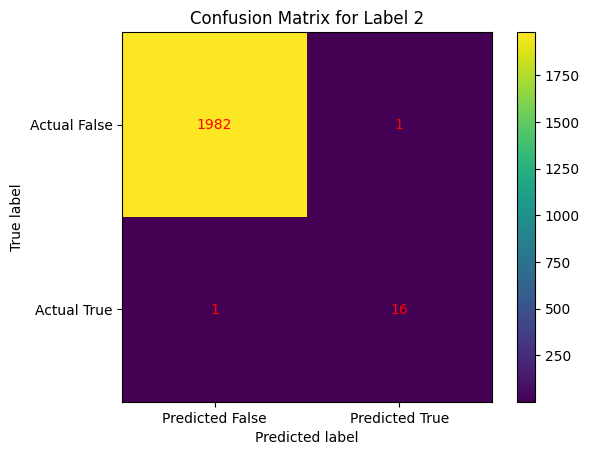

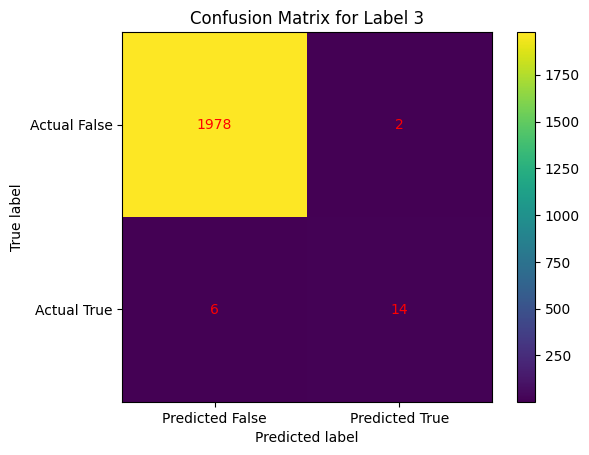

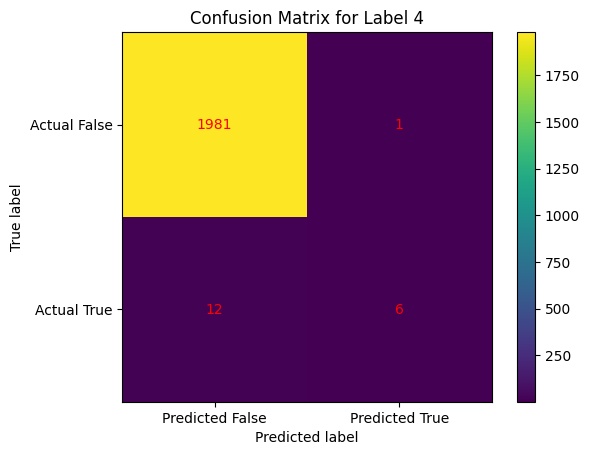

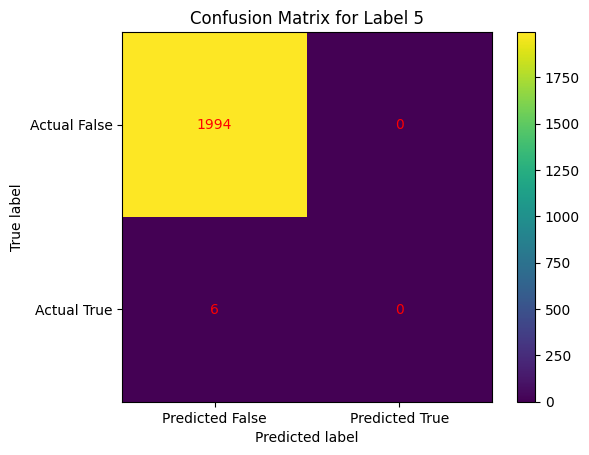

In [67]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are in a multilabel format
cm = multilabel_confusion_matrix(y_test, y_pred)

# Plot confusion matrices for each label
for i in range(len(cm)):
    plt.figure()
    plt.imshow(cm[i], interpolation='nearest')
    plt.title(f'Confusion Matrix for Label {i}')
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted False', 'Predicted True'])
    plt.yticks([0, 1], ['Actual False', 'Actual True'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    # Add annotations
    for j in range(2):  # Iterate over rows
        for k in range(2):  # Iterate over columns
            plt.text(k, j, str(cm[i][j][k]), ha='center', va='center', color='red')

    plt.show()


In [68]:
y_pred = model_rfc.predict(X_test)

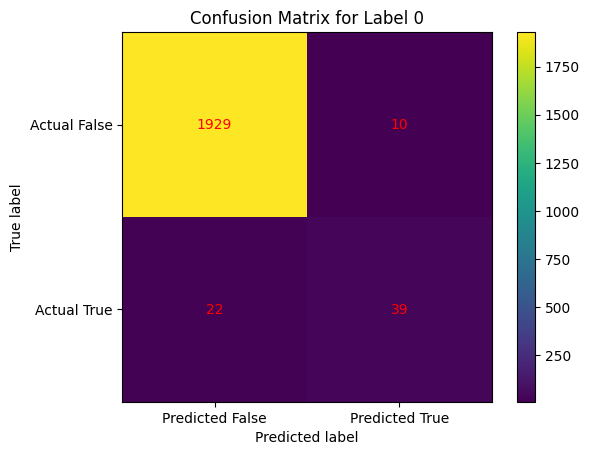

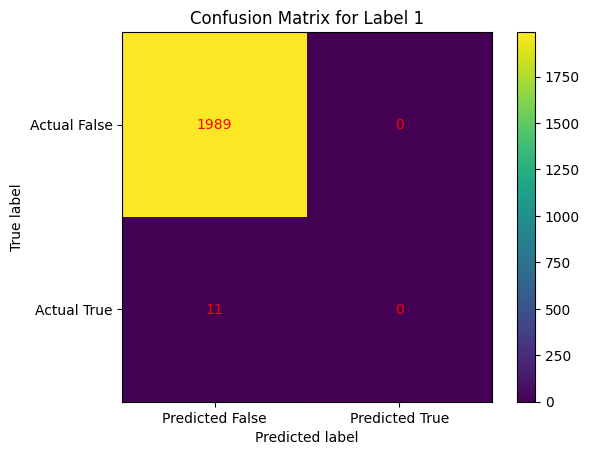

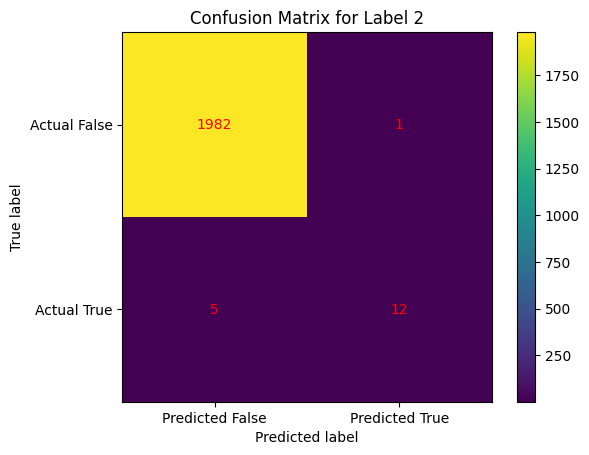

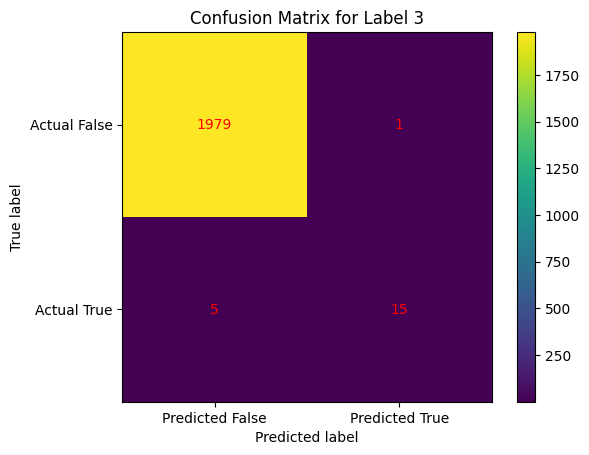

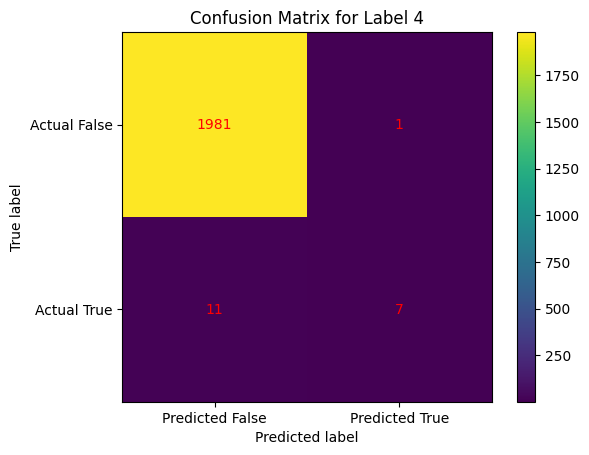

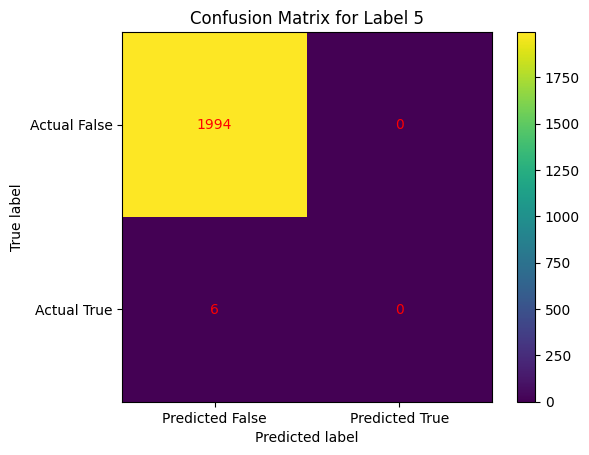

In [69]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are in a multilabel format
cm = multilabel_confusion_matrix(y_test, y_pred)

# Plot confusion matrices for each label
for i in range(len(cm)):
    plt.figure()
    plt.imshow(cm[i], interpolation='nearest')
    plt.title(f'Confusion Matrix for Label {i}')
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted False', 'Predicted True'])
    plt.yticks([0, 1], ['Actual False', 'Actual True'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    # Add annotations
    for j in range(2):  # Iterate over rows
        for k in range(2):  # Iterate over columns
            plt.text(k, j, str(cm[i][j][k]), ha='center', va='center', color='red')

    plt.show()


In [70]:
y_pred = model_voting.predict(X_test)

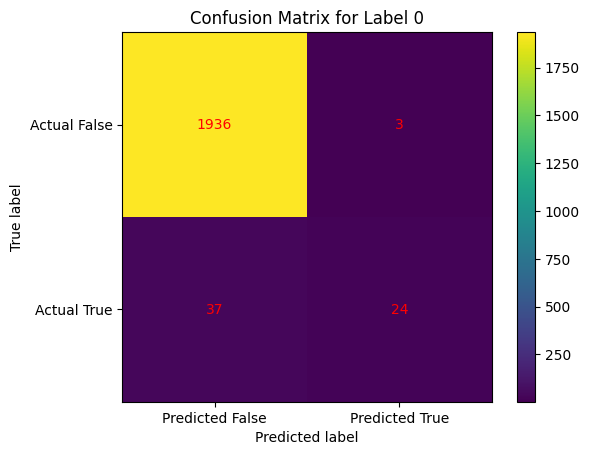

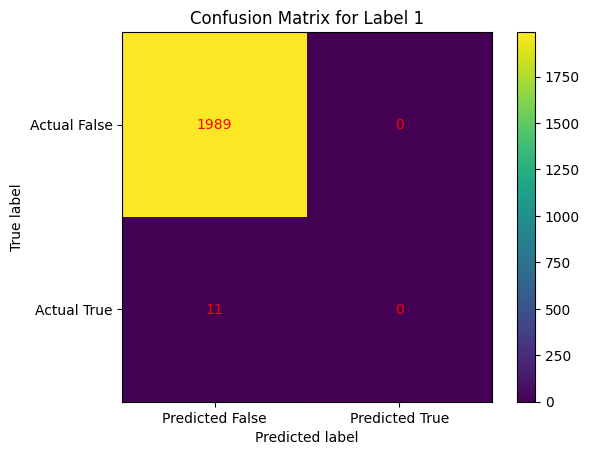

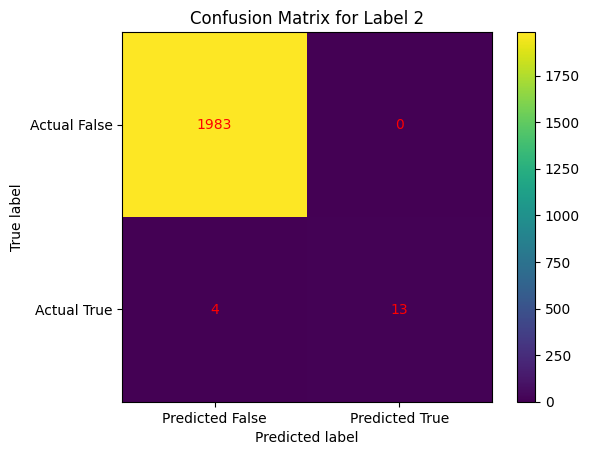

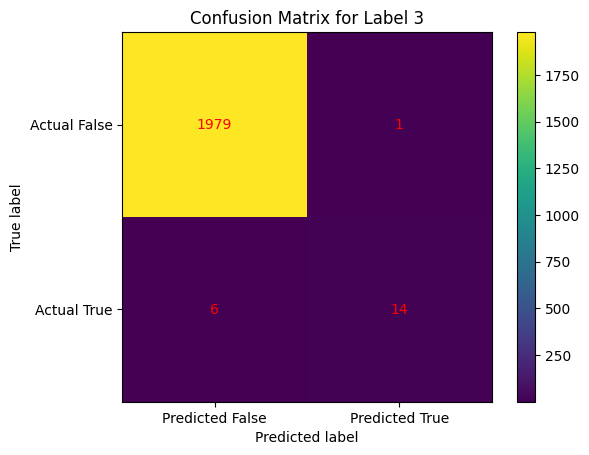

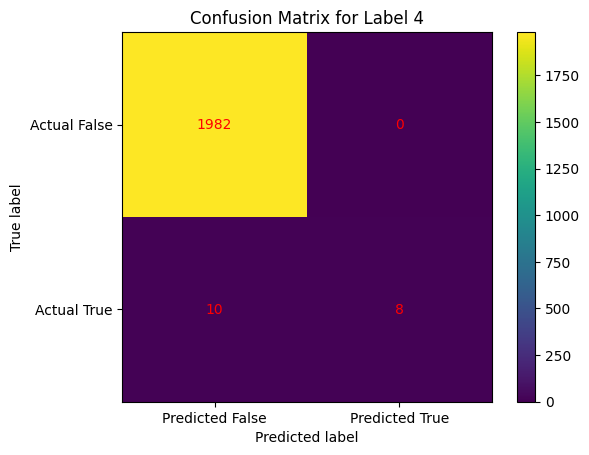

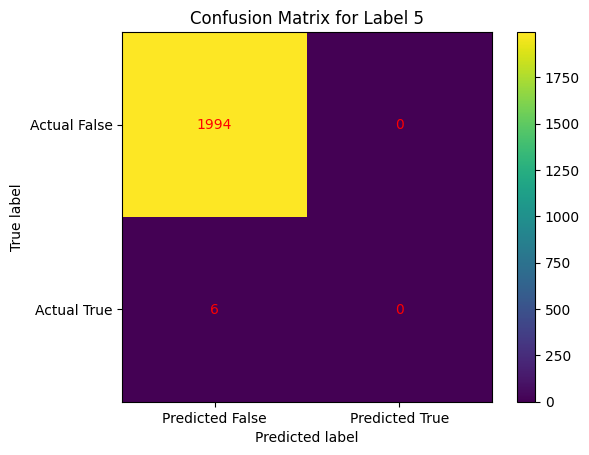

In [71]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are in a multilabel format
cm = multilabel_confusion_matrix(y_test, y_pred)

# Plot confusion matrices for each label
for i in range(len(cm)):
    plt.figure()
    plt.imshow(cm[i], interpolation='nearest')
    plt.title(f'Confusion Matrix for Label {i}')
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted False', 'Predicted True'])
    plt.yticks([0, 1], ['Actual False', 'Actual True'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    # Add annotations
    for j in range(2):  # Iterate over rows
        for k in range(2):  # Iterate over columns
            plt.text(k, j, str(cm[i][j][k]), ha='center', va='center', color='red')

    plt.show()


# deploying a model

In [72]:
file = "model.pkl"

In [73]:
import pickle

In [74]:
pickle.dump(model_gnb,open(file,'wb'))

In [75]:
loaded_model = pickle.load(open(file,'rb'))

In [76]:
result = loaded_model.score(X_test,y_test)

In [77]:
result

0.943